In [1]:
# Packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import ticker
import seaborn as sns
import joypy
import category_encoders as ce
import collections
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance

In [2]:
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

plots_barTexts_fontSize = 8

In [3]:
#Create 3 dataframes for the 3 datasets
#Read the data from the csv files
market_df = pd.read_excel('Case2_Market data_touched.xlsx')
market_df_original = market_df.copy()

In [4]:
sales_df = pd.read_csv('Case2_Sales data.csv', sep=";")
sales_df_original = sales_df.copy()

In [5]:
test_df = pd.read_csv('Case2_Test Set Template.csv', sep=";")
test_df_original = test_df.copy()

In [6]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 48 columns):
 #   Column                                                             Non-Null Count  Dtype 
---  ------                                                             --------------  ----- 
 0   Date - Index 2010=100 (if not otherwise noted)                     220 non-null    object
 1   Production Index Machinery & Electricals - China                   220 non-null    object
 2   Shipments Index Machinery & Electricals - China                    220 non-null    object
 3   Production Index Machinery & Electricals - France                  220 non-null    object
 4   Shipments Index Machinery & Electricals - France                   220 non-null    object
 5   Production Index Machinery & Electricals - Germany                 220 non-null    object
 6   Shipments Index Machinery & Electricals - Germany                  220 non-null    object
 7   Production Index Machinery & Electr

In [7]:
market_df.head()

,Date - Index 2010=100 (if not otherwise noted),Production Index Machinery & Electricals - China,Shipments Index Machinery & Electricals - China,Production Index Machinery & Electricals - France,Shipments Index Machinery & Electricals - France,Production Index Machinery & Electricals - Germany,Shipments Index Machinery & Electricals - Germany,Production Index Machinery & Electricals - Italy,Shipments Index Machinery & Electricals - Italy,Production Index Machinery & Electricals - Japan,...,"Production Index, Machinery and equipment n.e.c. - France","Production Index, Machinery and equipment n.e.c. - Germany","Production Index, Electrical equipment - United States","Production Index, Electrical equipment - zWorld","Production Index, Electrical equipment - Switzerland","Production Index, Electrical equipment - United Kingdom","Production Index, Electrical equipment - Italy","Production Index, Electrical equipment - Japan","Production Index, Electrical equipment - France","Production Index, Electrical equipment - Germany"
0,Extra Info,MAB_ELE_PRO156,MAB_ELE_SHP156,MAB_ELE_PRO250,MAB_ELE_SHP250,MAB_ELE_PRO276,MAB_ELE_SHP276,MAB_ELE_PRO380,MAB_ELE_SHP380,MAB_ELE_PRO392,...,PRO28250_org,PRO28276_org,PRO27840_org,PRO271000_org,PRO27756_org,PRO27826_org,PRO27380_org,PRO27392_org,PRO27250_org,PRO27276_org
1,2004m2,16.940704,16.940704,112.091273,83.458866,82.623037,79.452532,124.289603,86.560493,109.33401,...,118.274109,80.82901,117.723991,NaN,81.1,120.706516,141.510864,106.161262,102.077057,85.9132
2,2004m3,23.711852,23.711852,136.327976,106.168192,100.556582,97.012918,143.411662,106.344544,140.884616,...,148.121841,102.130104,119.220779,NaN,76.690307,138.30955,152.880234,140.288741,117.225685,97.670815
3,2004m4,24.435235,24.435235,117.791806,92.007646,89.653203,84.932358,129.083828,95.579673,105.853579,...,125.482231,90.961426,117.441124,NaN,71.552403,115.55733,137.796875,106.271197,105.335777,87.253983
4,2004m5,23.708115,23.708115,109.002541,85.696486,86.880571,82.372794,135.590391,100.087039,101.864777,...,116.64975,88.082901,117.899216,NaN,66.4145,119.269534,143.860535,101.60871,96.616508,84.675552


In [8]:
#create a new dataframe with the 1st row of the market_df
market_df_extra = market_df.iloc[0]
market_df_extra

Date - Index 2010=100 (if not otherwise noted)                                   Extra Info
Production Index Machinery & Electricals - China                             MAB_ELE_PRO156
Shipments Index Machinery & Electricals - China                              MAB_ELE_SHP156
Production Index Machinery & Electricals - France                            MAB_ELE_PRO250
Shipments Index Machinery & Electricals - France                             MAB_ELE_SHP250
Production Index Machinery & Electricals - Germany                           MAB_ELE_PRO276
Shipments Index Machinery & Electricals - Germany                            MAB_ELE_SHP276
Production Index Machinery & Electricals - Italy                             MAB_ELE_PRO380
Shipments Index Machinery & Electricals - Italy                              MAB_ELE_SHP380
Production Index Machinery & Electricals - Japan                             MAB_ELE_PRO392
Shipments Index Machinery & Electricals - Japan                              MAB

In [9]:
#drop the 1st row of the market_df
market_df = market_df.drop([0])
market_df.head()

,Date - Index 2010=100 (if not otherwise noted),Production Index Machinery & Electricals - China,Shipments Index Machinery & Electricals - China,Production Index Machinery & Electricals - France,Shipments Index Machinery & Electricals - France,Production Index Machinery & Electricals - Germany,Shipments Index Machinery & Electricals - Germany,Production Index Machinery & Electricals - Italy,Shipments Index Machinery & Electricals - Italy,Production Index Machinery & Electricals - Japan,...,"Production Index, Machinery and equipment n.e.c. - France","Production Index, Machinery and equipment n.e.c. - Germany","Production Index, Electrical equipment - United States","Production Index, Electrical equipment - zWorld","Production Index, Electrical equipment - Switzerland","Production Index, Electrical equipment - United Kingdom","Production Index, Electrical equipment - Italy","Production Index, Electrical equipment - Japan","Production Index, Electrical equipment - France","Production Index, Electrical equipment - Germany"
1,2004m2,16.940704,16.940704,112.091273,83.458866,82.623037,79.452532,124.289603,86.560493,109.33401,...,118.274109,80.82901,117.723991,NaN,81.1,120.706516,141.510864,106.161262,102.077057,85.9132
2,2004m3,23.711852,23.711852,136.327976,106.168192,100.556582,97.012918,143.411662,106.344544,140.884616,...,148.121841,102.130104,119.220779,NaN,76.690307,138.30955,152.880234,140.288741,117.225685,97.670815
3,2004m4,24.435235,24.435235,117.791806,92.007646,89.653203,84.932358,129.083828,95.579673,105.853579,...,125.482231,90.961426,117.441124,NaN,71.552403,115.55733,137.796875,106.271197,105.335777,87.253983
4,2004m5,23.708115,23.708115,109.002541,85.696486,86.880571,82.372794,135.590391,100.087039,101.864777,...,116.64975,88.082901,117.899216,NaN,66.4145,119.269534,143.860535,101.60871,96.616508,84.675552
5,2004m6,27.009138,27.009138,133.785737,106.641482,99.010814,95.10874,136.424935,110.889719,120.33292,...,143.248734,100.978699,119.499107,NaN,61.276596,128.849416,144.315308,116.655248,118.45871,95.401802


In [10]:
sales_df.head()

,DATE,Mapped_GCK,Sales_EUR
0,01.10.2018,#1,0
1,02.10.2018,#1,0
2,03.10.2018,#1,0
3,04.10.2018,#1,0
4,05.10.2018,#1,0


In [11]:
test_df.head()

,Month Year,Mapped_GCK,Sales_EUR
0,Mai 22,#3,NaN
1,Jun 22,#3,NaN
2,Jul 22,#3,NaN
3,Aug 22,#3,NaN
4,Sep 22,#3,NaN


In [12]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DATE        9802 non-null   object
 1   Mapped_GCK  9802 non-null   object
 2   Sales_EUR   9802 non-null   object
dtypes: object(3)
memory usage: 229.9+ KB


In [13]:
#Incoherences
#convert Sales_EUR to numeric
sales_df['Sales_EUR'] = pd.to_numeric(sales_df['Sales_EUR'].str.replace(',','.'))

In [14]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        9802 non-null   object 
 1   Mapped_GCK  9802 non-null   object 
 2   Sales_EUR   9802 non-null   float64
dtypes: float64(1), object(2)
memory usage: 229.9+ KB


In [15]:
#Incoherences
#Replace all the '.' in DATE with'/' in the sales_df
sales_df['DATE'] = sales_df['DATE'].str.replace('.', '/')

C:\Users\Estevao\AppData\Local\Temp\ipykernel_7800\1586866528.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sales_df['DATE'] = sales_df['DATE'].str.replace('.', '/')


In [16]:
sales_df.head()

,DATE,Mapped_GCK,Sales_EUR
0,01/10/2018,#1,0.0
1,02/10/2018,#1,0.0
2,03/10/2018,#1,0.0
3,04/10/2018,#1,0.0
4,05/10/2018,#1,0.0


In [17]:
#Change the place of the day and month on the DATE column
sales_df['DATE'] = pd.to_datetime(sales_df['DATE'], format='%d/%m/%Y')

In [18]:
#in sales_df, group by the month and year and sum the sales
sales_df['DATE'] = pd.to_datetime(sales_df['DATE'])
sales_df['Month'] = sales_df['DATE'].dt.month
sales_df['Year'] = sales_df['DATE'].dt.year

In [19]:
sales_df.head()

,DATE,Mapped_GCK,Sales_EUR,Month,Year
0,2018-10-01,#1,0.0,10,2018
1,2018-10-02,#1,0.0,10,2018
2,2018-10-03,#1,0.0,10,2018
3,2018-10-04,#1,0.0,10,2018
4,2018-10-05,#1,0.0,10,2018


In [20]:
#Create NewDate that is only the month and year
sales_df['NewDate'] = sales_df['DATE'].dt.to_period('M')

In [21]:
sales_df.head()

,DATE,Mapped_GCK,Sales_EUR,Month,Year,NewDate
0,2018-10-01,#1,0.0,10,2018,2018-10
1,2018-10-02,#1,0.0,10,2018,2018-10
2,2018-10-03,#1,0.0,10,2018,2018-10
3,2018-10-04,#1,0.0,10,2018,2018-10
4,2018-10-05,#1,0.0,10,2018,2018-10


In [22]:
sales_df['Sales_EUR'].min(),sales_df['Sales_EUR'].max()

(-506381.17, 41127988.02)

<Axes: xlabel='NewDate'>

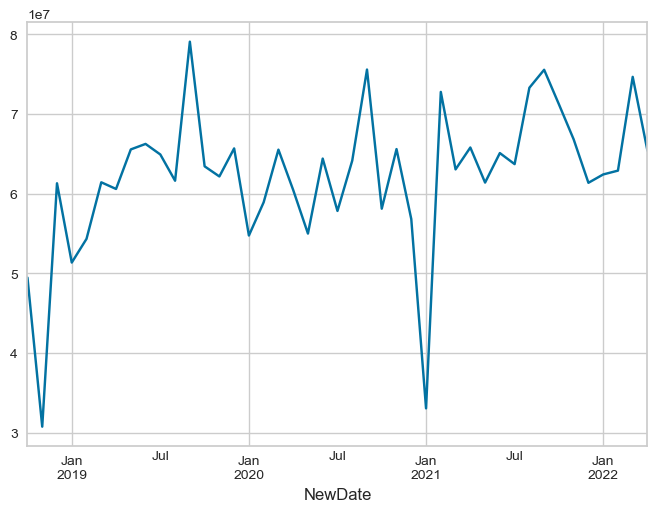

In [23]:
#What is the total Sales_EUR by newDate
sales_df.groupby('NewDate')['Sales_EUR'].sum().plot()

### Jan 2021 kinda like an outlier, that could wrongly influence our predictions

### Feature Eng

In [24]:
sales_by_month = sales_df.groupby('NewDate')['Sales_EUR'].sum()
sales_by_month


NewDate
2018-10    49471370.83
2018-11    30760578.47
2018-12    61312068.79
2019-01    51360149.23
2019-02    54336933.67
2019-03    61435886.28
2019-04    60598035.44
2019-05    65563813.36
2019-06    66251932.08
2019-07    64925427.91
2019-08    61630019.14
2019-09    79087221.00
2019-10    63440758.36
2019-11    62168871.18
2019-12    65689212.91
2020-01    54752820.51
2020-02    58926297.86
2020-03    65532628.65
2020-04    60473324.95
2020-05    55001727.63
2020-06    64410726.64
2020-07    57838604.40
2020-08    64152808.89
2020-09    75588391.22
2020-10    58121991.70
2020-11    65603872.57
2020-12    56815684.33
2021-01    33057643.26
2021-02    72781252.24
2021-03    63055558.50
2021-04    65803190.42
2021-05    61399858.98
2021-06    65103351.13
2021-07    63716228.84
2021-08    73303028.73
2021-09    75559949.83
2021-10    71231256.10
2021-11    66824106.32
2021-12    61373034.62
2022-01    62420188.07
2022-02    62901069.54
2022-03    74671315.08
2022-04    65393111.01
Fre

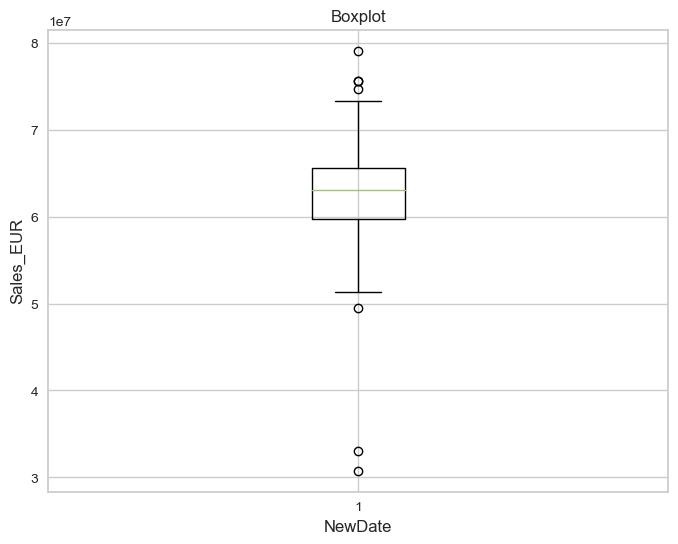

In [25]:
#Do a boxplot of the sales_by_month

plt.figure(figsize=(8, 6))
plt.boxplot(sales_by_month)
plt.title('Boxplot')
plt.xlabel('NewDate')
plt.ylabel('Sales_EUR')
plt.grid(True)
plt.show()

<Axes: xlabel='NewDate'>

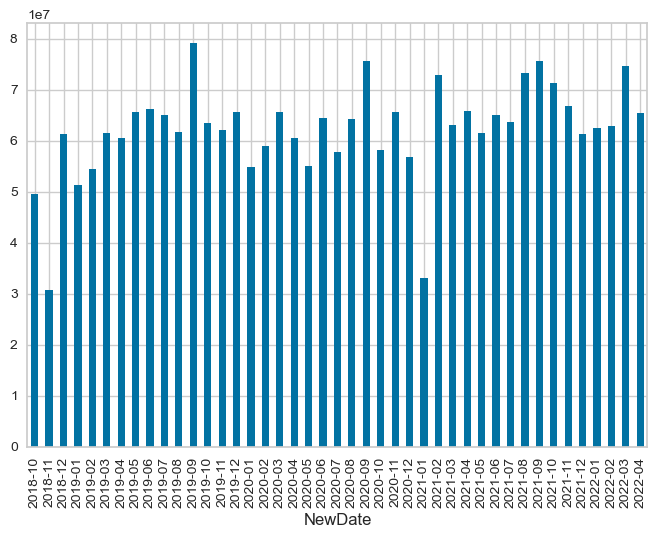

In [26]:
sales_by_month.plot(kind='bar')

In [27]:
sales_df.groupby('Year')['Sales_EUR'].sum()

Year
2018    1.415440e+08
2019    7.564883e+08
2020    7.372189e+08
2021    7.732085e+08
2022    2.653857e+08
Name: Sales_EUR, dtype: float64

<Axes: xlabel='Year'>

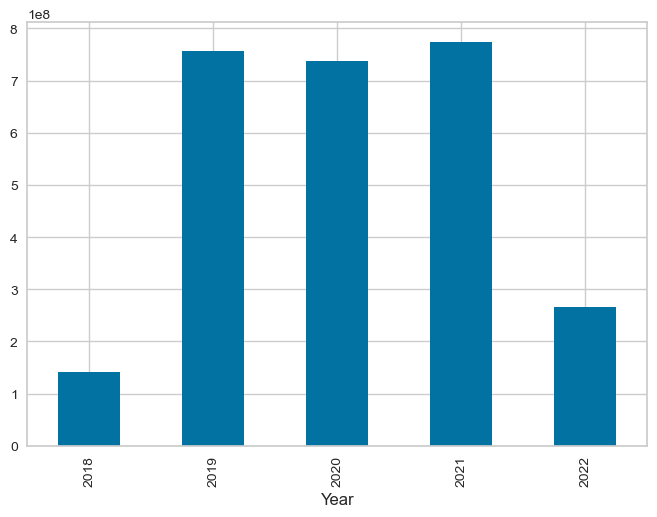

In [28]:
#put it in full numbers
sales_df.groupby('Year')['Sales_EUR'].sum().plot(kind='bar')


In [29]:
#Show only the columns with missing values
market_df.isnull().sum()[market_df.isnull().sum() > 0]

Production Index Machinery & Electricals - Switzerland             1
Shipments Index Machinery & Electricals - Switzerland              1
Shipments Index Machinery & Electricals - United Kingdom          18
Shipments Index Machinery & Electricals - United States            1
Producer Prices, Electrical equipment - United Kingdom            18
Producer Prices, Electrical equipment - France                    35
Producer Prices, Electrical equipment - China                     23
Production Index, Machinery and equipment n.e.c. - Switzerland     1
Production Index, Electrical equipment - zWorld                   11
Production Index, Electrical equipment - Switzerland               1
dtype: int64

In [30]:
sales_df.isnull().sum()[sales_df.isnull().sum() > 0]

Series([], dtype: int64)

In [31]:
test_df.isnull().sum()[test_df.isnull().sum() > 0]

Sales_EUR    140
dtype: int64

In [32]:
market_df_extra.isnull().sum()[market_df_extra.isnull().sum() > 0]

array([], dtype=int64)

# What do these nans mean? Mean 0, unknown, or simply didnt happen

In [33]:
#Replace all the nans in market_df with 0
#market_df.fillna(0, inplace=True)

### Feature Eng

In [34]:
# sales by product group (Mapped_GCK)
sales_by_prodgroup = sales_df.groupby('Mapped_GCK')['Sales_EUR'].sum()
pd.options.display.float_format = '{:.2f}'.format
sales_by_prodgroup 

Mapped_GCK
#1    1544205996.76
#11     65901314.65
#12      8279486.32
#13      1009156.91
#14       493822.06
#16     18391175.71
#20        78326.86
#3     533443487.70
#36       998613.91
#4      15627204.96
#5     429595158.01
#6      20641890.49
#8      34871219.82
#9        308446.51
Name: Sales_EUR, dtype: float64

In [35]:
#How many products are in each product group
sales_df['Mapped_GCK'].value_counts()

#1     1179
#3     1017
#5      959
#8      944
#4      877
#12     803
#6      794
#16     765
#11     732
#13     441
#36     434
#9      333
#20     293
#14     231
Name: Mapped_GCK, dtype: int64

<Axes: xlabel='Mapped_GCK'>

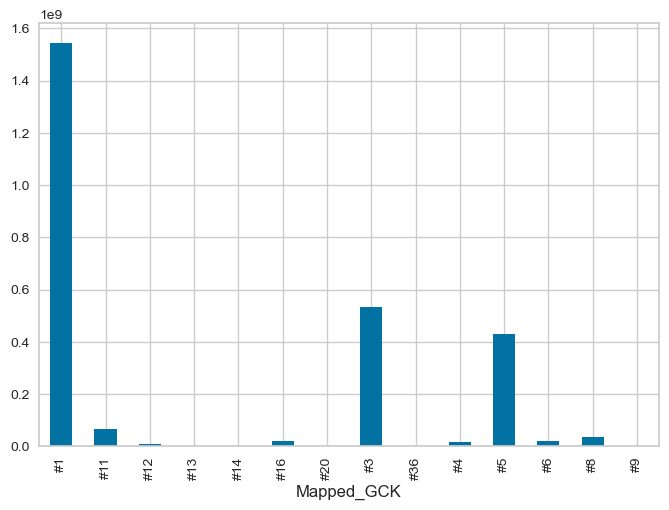

In [36]:
#plot the sales by product group
sales_by_prodgroup.plot(kind='bar')

In [37]:
# Incoherences

In [38]:
# Check which features are categorical
market_df.dtypes[market_df.dtypes == 'object']

Date - Index 2010=100 (if not otherwise noted)                       object
Production Index Machinery & Electricals - China                     object
Shipments Index Machinery & Electricals - China                      object
Production Index Machinery & Electricals - France                    object
Shipments Index Machinery & Electricals - France                     object
Production Index Machinery & Electricals - Germany                   object
Shipments Index Machinery & Electricals - Germany                    object
Production Index Machinery & Electricals - Italy                     object
Shipments Index Machinery & Electricals - Italy                      object
Production Index Machinery & Electricals - Japan                     object
Shipments Index Machinery & Electricals - Japan                      object
Production Index Machinery & Electricals - Switzerland               object
Shipments Index Machinery & Electricals - Switzerland                object
Production I

In [39]:
# Check which features are numerical
market_df.dtypes[market_df.dtypes != 'object']

Series([], dtype: object)

In [40]:
market_df.head()

,Date - Index 2010=100 (if not otherwise noted),Production Index Machinery & Electricals - China,Shipments Index Machinery & Electricals - China,Production Index Machinery & Electricals - France,Shipments Index Machinery & Electricals - France,Production Index Machinery & Electricals - Germany,Shipments Index Machinery & Electricals - Germany,Production Index Machinery & Electricals - Italy,Shipments Index Machinery & Electricals - Italy,Production Index Machinery & Electricals - Japan,...,"Production Index, Machinery and equipment n.e.c. - France","Production Index, Machinery and equipment n.e.c. - Germany","Production Index, Electrical equipment - United States","Production Index, Electrical equipment - zWorld","Production Index, Electrical equipment - Switzerland","Production Index, Electrical equipment - United Kingdom","Production Index, Electrical equipment - Italy","Production Index, Electrical equipment - Japan","Production Index, Electrical equipment - France","Production Index, Electrical equipment - Germany"
1,2004m2,16.94,16.94,112.09,83.46,82.62,79.45,124.29,86.56,109.33,...,118.27,80.83,117.72,NaN,81.10,120.71,141.51,106.16,102.08,85.91
2,2004m3,23.71,23.71,136.33,106.17,100.56,97.01,143.41,106.34,140.88,...,148.12,102.13,119.22,NaN,76.69,138.31,152.88,140.29,117.23,97.67
3,2004m4,24.44,24.44,117.79,92.01,89.65,84.93,129.08,95.58,105.85,...,125.48,90.96,117.44,NaN,71.55,115.56,137.80,106.27,105.34,87.25
4,2004m5,23.71,23.71,109.00,85.70,86.88,82.37,135.59,100.09,101.86,...,116.65,88.08,117.90,NaN,66.41,119.27,143.86,101.61,96.62,84.68
5,2004m6,27.01,27.01,133.79,106.64,99.01,95.11,136.42,110.89,120.33,...,143.25,100.98,119.50,NaN,61.28,128.85,144.32,116.66,118.46,95.40


In [41]:
#Incoherences
#On the Date column, change the 'm' to '-'
market_df['Date - Index 2010=100 (if not otherwise noted)'] = market_df['Date - Index 2010=100 (if not otherwise noted)'].str.replace('m', '-')
market_df.head(12)

,Date - Index 2010=100 (if not otherwise noted),Production Index Machinery & Electricals - China,Shipments Index Machinery & Electricals - China,Production Index Machinery & Electricals - France,Shipments Index Machinery & Electricals - France,Production Index Machinery & Electricals - Germany,Shipments Index Machinery & Electricals - Germany,Production Index Machinery & Electricals - Italy,Shipments Index Machinery & Electricals - Italy,Production Index Machinery & Electricals - Japan,...,"Production Index, Machinery and equipment n.e.c. - France","Production Index, Machinery and equipment n.e.c. - Germany","Production Index, Electrical equipment - United States","Production Index, Electrical equipment - zWorld","Production Index, Electrical equipment - Switzerland","Production Index, Electrical equipment - United Kingdom","Production Index, Electrical equipment - Italy","Production Index, Electrical equipment - Japan","Production Index, Electrical equipment - France","Production Index, Electrical equipment - Germany"
1,2004-2,16.94,16.94,112.09,83.46,82.62,79.45,124.29,86.56,109.33,...,118.27,80.83,117.72,NaN,81.10,120.71,141.51,106.16,102.08,85.91
2,2004-3,23.71,23.71,136.33,106.17,100.56,97.01,143.41,106.34,140.88,...,148.12,102.13,119.22,NaN,76.69,138.31,152.88,140.29,117.23,97.67
3,2004-4,24.44,24.44,117.79,92.01,89.65,84.93,129.08,95.58,105.85,...,125.48,90.96,117.44,NaN,71.55,115.56,137.80,106.27,105.34,87.25
4,2004-5,23.71,23.71,109.00,85.70,86.88,82.37,135.59,100.09,101.86,...,116.65,88.08,117.90,NaN,66.41,119.27,143.86,101.61,96.62,84.68
5,2004-6,27.01,27.01,133.79,106.64,99.01,95.11,136.42,110.89,120.33,...,143.25,100.98,119.50,NaN,61.28,128.85,144.32,116.66,118.46,95.40
6,2004-7,23.59,23.59,117.41,89.30,94.20,89.65,140.35,106.13,118.14,...,122.03,95.68,115.28,NaN,63.55,119.27,151.29,116.63,109.92,91.48
7,2004-8,24.28,24.28,79.14,71.80,82.80,80.20,54.40,49.05,106.24,...,79.49,83.25,119.80,NaN,65.82,112.92,56.47,98.87,78.56,81.99
8,2004-9,25.99,25.99,130.49,98.90,102.04,101.19,130.66,104.56,124.93,...,136.45,103.97,121.15,NaN,68.09,130.53,153.79,114.67,120.84,98.50
9,2004-10,24.90,24.90,119.71,99.60,93.52,89.05,133.23,95.90,104.92,...,120.91,93.96,123.40,NaN,64.33,125.98,148.48,97.56,117.75,92.72
10,2004-11,26.77,26.77,114.51,86.51,97.13,93.85,130.11,105.54,112.83,...,117.56,96.95,124.75,NaN,60.58,132.56,143.71,103.85,109.56,97.46


In [42]:
cell_content = market_df.at[1, 'Date - Index 2010=100 (if not otherwise noted)']
num_characters = len(cell_content)
print("Number of characters in the cell:", num_characters)

Number of characters in the cell: 7


In [43]:
cell_content = market_df.at[11, 'Date - Index 2010=100 (if not otherwise noted)']
num_characters = len(cell_content)
print("Number of characters in the cell:", num_characters)

Number of characters in the cell: 7


In [44]:
#Incoherences
#On the date column add a 0 to the months that have only 1 digit
market_df['Date - Index 2010=100 (if not otherwise noted)'] = market_df['Date - Index 2010=100 (if not otherwise noted)'].str.replace('-1', '-01')
market_df['Date - Index 2010=100 (if not otherwise noted)'] = market_df['Date - Index 2010=100 (if not otherwise noted)'].str.replace('-2', '-02')
market_df['Date - Index 2010=100 (if not otherwise noted)'] = market_df['Date - Index 2010=100 (if not otherwise noted)'].str.replace('-3', '-03')
market_df['Date - Index 2010=100 (if not otherwise noted)'] = market_df['Date - Index 2010=100 (if not otherwise noted)'].str.replace('-4', '-04')
market_df['Date - Index 2010=100 (if not otherwise noted)'] = market_df['Date - Index 2010=100 (if not otherwise noted)'].str.replace('-5', '-05')
market_df['Date - Index 2010=100 (if not otherwise noted)'] = market_df['Date - Index 2010=100 (if not otherwise noted)'].str.replace('-6', '-06')
market_df['Date - Index 2010=100 (if not otherwise noted)'] = market_df['Date - Index 2010=100 (if not otherwise noted)'].str.replace('-7', '-07')
market_df['Date - Index 2010=100 (if not otherwise noted)'] = market_df['Date - Index 2010=100 (if not otherwise noted)'].str.replace('-8', '-08')
market_df['Date - Index 2010=100 (if not otherwise noted)'] = market_df['Date - Index 2010=100 (if not otherwise noted)'].str.replace('-9', '-09')
market_df['Date - Index 2010=100 (if not otherwise noted)']

1       2004-02
2       2004-03
3       2004-04
4       2004-05
5       2004-06
         ...   
215    2021-012
216     2022-01
217     2022-02
218     2022-03
219     2022-04
Name: Date - Index 2010=100 (if not otherwise noted), Length: 219, dtype: object

In [45]:
market_df['Date - Index 2010=100 (if not otherwise noted)'] = market_df['Date - Index 2010=100 (if not otherwise noted)'].str.replace('-010', '-10')
market_df['Date - Index 2010=100 (if not otherwise noted)'] = market_df['Date - Index 2010=100 (if not otherwise noted)'].str.replace('-011', '-11')
market_df['Date - Index 2010=100 (if not otherwise noted)'] = market_df['Date - Index 2010=100 (if not otherwise noted)'].str.replace('-012', '-12')
market_df['Date - Index 2010=100 (if not otherwise noted)']

1       2004-02
2       2004-03
3       2004-04
4       2004-05
5       2004-06
         ...   
215     2021-12
216     2022-01
217     2022-02
218     2022-03
219     2022-04
Name: Date - Index 2010=100 (if not otherwise noted), Length: 219, dtype: object

In [46]:
#Convert the date column to datetime year and month
market_df['Date - Index 2010=100 (if not otherwise noted)'] = pd.to_datetime(market_df['Date - Index 2010=100 (if not otherwise noted)'], format='%Y-%m')

In [47]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 1 to 219
Data columns (total 48 columns):
 #   Column                                                             Non-Null Count  Dtype         
---  ------                                                             --------------  -----         
 0   Date - Index 2010=100 (if not otherwise noted)                     219 non-null    datetime64[ns]
 1   Production Index Machinery & Electricals - China                   219 non-null    object        
 2   Shipments Index Machinery & Electricals - China                    219 non-null    object        
 3   Production Index Machinery & Electricals - France                  219 non-null    object        
 4   Shipments Index Machinery & Electricals - France                   219 non-null    object        
 5   Production Index Machinery & Electricals - Germany                 219 non-null    object        
 6   Shipments Index Machinery & Electricals - Germany                 

In [48]:
#Convert all the columns to numeric
market_df = market_df.apply(pd.to_numeric, errors='ignore')

In [49]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 1 to 219
Data columns (total 48 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Date - Index 2010=100 (if not otherwise noted)                     219 non-null    int64  
 1   Production Index Machinery & Electricals - China                   219 non-null    float64
 2   Shipments Index Machinery & Electricals - China                    219 non-null    float64
 3   Production Index Machinery & Electricals - France                  219 non-null    float64
 4   Shipments Index Machinery & Electricals - France                   219 non-null    float64
 5   Production Index Machinery & Electricals - Germany                 219 non-null    float64
 6   Shipments Index Machinery & Electricals - Germany                  219 non-null    float64
 7   Production Index Machinery

In [50]:
#convert back the date column to datetime
market_df['Date - Index 2010=100 (if not otherwise noted)'] = pd.to_datetime(market_df['Date - Index 2010=100 (if not otherwise noted)'])
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 1 to 219
Data columns (total 48 columns):
 #   Column                                                             Non-Null Count  Dtype         
---  ------                                                             --------------  -----         
 0   Date - Index 2010=100 (if not otherwise noted)                     219 non-null    datetime64[ns]
 1   Production Index Machinery & Electricals - China                   219 non-null    float64       
 2   Shipments Index Machinery & Electricals - China                    219 non-null    float64       
 3   Production Index Machinery & Electricals - France                  219 non-null    float64       
 4   Shipments Index Machinery & Electricals - France                   219 non-null    float64       
 5   Production Index Machinery & Electricals - Germany                 219 non-null    float64       
 6   Shipments Index Machinery & Electricals - Germany                 

In [51]:
market_df.head()

,Date - Index 2010=100 (if not otherwise noted),Production Index Machinery & Electricals - China,Shipments Index Machinery & Electricals - China,Production Index Machinery & Electricals - France,Shipments Index Machinery & Electricals - France,Production Index Machinery & Electricals - Germany,Shipments Index Machinery & Electricals - Germany,Production Index Machinery & Electricals - Italy,Shipments Index Machinery & Electricals - Italy,Production Index Machinery & Electricals - Japan,...,"Production Index, Machinery and equipment n.e.c. - France","Production Index, Machinery and equipment n.e.c. - Germany","Production Index, Electrical equipment - United States","Production Index, Electrical equipment - zWorld","Production Index, Electrical equipment - Switzerland","Production Index, Electrical equipment - United Kingdom","Production Index, Electrical equipment - Italy","Production Index, Electrical equipment - Japan","Production Index, Electrical equipment - France","Production Index, Electrical equipment - Germany"
1,2004-02-01,16.94,16.94,112.09,83.46,82.62,79.45,124.29,86.56,109.33,...,118.27,80.83,117.72,NaN,81.10,120.71,141.51,106.16,102.08,85.91
2,2004-03-01,23.71,23.71,136.33,106.17,100.56,97.01,143.41,106.34,140.88,...,148.12,102.13,119.22,NaN,76.69,138.31,152.88,140.29,117.23,97.67
3,2004-04-01,24.44,24.44,117.79,92.01,89.65,84.93,129.08,95.58,105.85,...,125.48,90.96,117.44,NaN,71.55,115.56,137.80,106.27,105.34,87.25
4,2004-05-01,23.71,23.71,109.00,85.70,86.88,82.37,135.59,100.09,101.86,...,116.65,88.08,117.90,NaN,66.41,119.27,143.86,101.61,96.62,84.68
5,2004-06-01,27.01,27.01,133.79,106.64,99.01,95.11,136.42,110.89,120.33,...,143.25,100.98,119.50,NaN,61.28,128.85,144.32,116.66,118.46,95.40


In [52]:
testenan = market_df.drop('Date - Index 2010=100 (if not otherwise noted)', axis=1).sum(axis=1)
testenan

1     3795.26
2     4293.42
3     3864.20
4     3839.93
5     4158.95
        ...  
215   5596.58
216   5050.84
217   5313.63
218   6211.34
219   4910.09
Length: 219, dtype: float64

In [53]:
#market_df.fillna(0, inplace=True)

In [54]:
#Only the columns with missing values
market_df.isnull().sum()[market_df.isnull().sum() > 0]

Production Index Machinery & Electricals - Switzerland             1
Shipments Index Machinery & Electricals - Switzerland              1
Shipments Index Machinery & Electricals - United Kingdom          18
Shipments Index Machinery & Electricals - United States            1
Producer Prices, Electrical equipment - United Kingdom            18
Producer Prices, Electrical equipment - France                    35
Producer Prices, Electrical equipment - China                     23
Production Index, Machinery and equipment n.e.c. - Switzerland     1
Production Index, Electrical equipment - zWorld                   11
Production Index, Electrical equipment - Switzerland               1
dtype: int64

### Feature Eng

In [55]:
#Create a new feature that is the Balance by each country, the production - shipment - Production Index Machinery & Electricals
market_df['CHN_Balance'] = market_df['Production Index Machinery & Electricals - China'] - market_df['Shipments Index Machinery & Electricals - China']
market_df['FRA_Balance'] = market_df['Production Index Machinery & Electricals - France'] - market_df['Shipments Index Machinery & Electricals - France']
market_df['GER_Balance'] = market_df['Production Index Machinery & Electricals - Germany'] - market_df['Shipments Index Machinery & Electricals - Germany']
market_df['ITA_Balance'] = market_df['Production Index Machinery & Electricals - Italy'] - market_df['Shipments Index Machinery & Electricals - Italy']
market_df['JAP_Balance'] = market_df['Production Index Machinery & Electricals - Japan'] - market_df['Shipments Index Machinery & Electricals - Japan']
market_df['SWI_Balance'] = market_df['Production Index Machinery & Electricals - Switzerland'] - market_df['Shipments Index Machinery & Electricals - Switzerland']
market_df['UK_Balance'] = market_df['Production Index Machinery & Electricals - United Kingdom'] - market_df['Shipments Index Machinery & Electricals - United Kingdom']
market_df['US_Balance'] = market_df['Production Index Machinery & Electricals - United States'] - market_df['Shipments Index Machinery & Electricals - United States']
market_df['EUR_Balance'] = market_df['Production Index Machinery & Electricals - Europe'] - market_df['Shipments Index Machinery & Electricals - Europe']


In [56]:
market_df.head()

,Date - Index 2010=100 (if not otherwise noted),Production Index Machinery & Electricals - China,Shipments Index Machinery & Electricals - China,Production Index Machinery & Electricals - France,Shipments Index Machinery & Electricals - France,Production Index Machinery & Electricals - Germany,Shipments Index Machinery & Electricals - Germany,Production Index Machinery & Electricals - Italy,Shipments Index Machinery & Electricals - Italy,Production Index Machinery & Electricals - Japan,...,"Production Index, Electrical equipment - Germany",CHN_Balance,FRA_Balance,GER_Balance,ITA_Balance,JAP_Balance,SWI_Balance,UK_Balance,US_Balance,EUR_Balance
1,2004-02-01,16.94,16.94,112.09,83.46,82.62,79.45,124.29,86.56,109.33,...,85.91,0.00,28.63,3.17,37.73,-1.16,1.23,37.75,28.36,17.02
2,2004-03-01,23.71,23.71,136.33,106.17,100.56,97.01,143.41,106.34,140.88,...,97.67,0.00,30.16,3.54,37.07,-3.80,5.98,43.51,11.57,17.77
3,2004-04-01,24.44,24.44,117.79,92.01,89.65,84.93,129.08,95.58,105.85,...,87.25,0.00,25.78,4.72,33.50,3.20,5.88,35.71,18.39,16.55
4,2004-05-01,23.71,23.71,109.00,85.70,86.88,82.37,135.59,100.09,101.86,...,84.68,0.00,23.31,4.51,35.50,1.56,5.78,36.05,20.96,16.79
5,2004-06-01,27.01,27.01,133.79,106.64,99.01,95.11,136.42,110.89,120.33,...,95.40,0.00,27.14,3.90,25.54,0.72,5.68,39.68,13.21,15.09


In [57]:
#Show only the columns with missing values
market_df.isnull().sum()[market_df.isnull().sum() > 0]

Production Index Machinery & Electricals - Switzerland             1
Shipments Index Machinery & Electricals - Switzerland              1
Shipments Index Machinery & Electricals - United Kingdom          18
Shipments Index Machinery & Electricals - United States            1
Producer Prices, Electrical equipment - United Kingdom            18
Producer Prices, Electrical equipment - France                    35
Producer Prices, Electrical equipment - China                     23
Production Index, Machinery and equipment n.e.c. - Switzerland     1
Production Index, Electrical equipment - zWorld                   11
Production Index, Electrical equipment - Switzerland               1
SWI_Balance                                                        1
UK_Balance                                                        18
US_Balance                                                         1
dtype: int64

In [58]:
# Sum of Productions-Shipments (Machinery & Electricals)
print("China Balance:", market_df['CHN_Balance'].sum())
print("France Balance:", market_df['FRA_Balance'].sum())
print("Germany Balance:", market_df['GER_Balance'].sum())
print("Italy Balance:", market_df['ITA_Balance'].sum())
print("Japan Balance:", market_df['JAP_Balance'].sum())
print("Switzerland Balance:", market_df['SWI_Balance'].sum())
print("UK Balance:", market_df['UK_Balance'].sum())
print("US Balance:", market_df['US_Balance'].sum())
print("Europe Balance:", market_df['EUR_Balance'].sum())

China Balance: 0.0
France Balance: -193.79227851683072
Germany Balance: -1620.43595837514
Italy Balance: -111.03629159255365
Japan Balance: -158.21789071500652
Switzerland Balance: 664.8128923607361
UK Balance: 2646.147403460982
US Balance: -1041.2493269501874
Europe Balance: -387.8799637178739


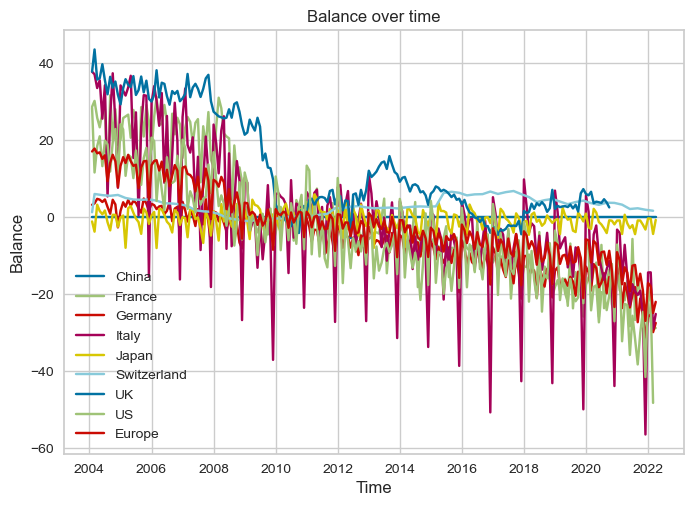

In [59]:
import matplotlib.pyplot as plt

# Assuming market_df is a DataFrame and 'China_Balance', 'France_Balance' are columns
plt.plot(market_df['Date - Index 2010=100 (if not otherwise noted)'], market_df['CHN_Balance'], label='China')
plt.plot(market_df['Date - Index 2010=100 (if not otherwise noted)'], market_df['FRA_Balance'], label='France')
plt.plot(market_df['Date - Index 2010=100 (if not otherwise noted)'], market_df['GER_Balance'], label='Germany')
plt.plot(market_df['Date - Index 2010=100 (if not otherwise noted)'], market_df['ITA_Balance'], label='Italy')
plt.plot(market_df['Date - Index 2010=100 (if not otherwise noted)'], market_df['JAP_Balance'], label='Japan')
plt.plot(market_df['Date - Index 2010=100 (if not otherwise noted)'], market_df['SWI_Balance'], label='Switzerland')
plt.plot(market_df['Date - Index 2010=100 (if not otherwise noted)'], market_df['UK_Balance'], label='UK')
plt.plot(market_df['Date - Index 2010=100 (if not otherwise noted)'], market_df['US_Balance'], label='US')
plt.plot(market_df['Date - Index 2010=100 (if not otherwise noted)'], market_df['EUR_Balance'], label='Europe')
# Add more lines as needed

plt.title('Balance over time')
plt.xlabel('Time')
plt.ylabel('Balance')
plt.legend()
plt.show()


In [60]:
#Feature Eng
#Create a new feature that is the averagr of the balances
market_df['Average_Balance'] = market_df[['CHN_Balance', 'FRA_Balance','GER_Balance', 'ITA_Balance', 'JAP_Balance', 'SWI_Balance', 'UK_Balance', 'US_Balance', 'EUR_Balance']].mean(axis=1)
market_df['Average_Balance']

1      16.97
2      16.20
3      15.97
4      16.05
5      14.55
       ...  
215   -23.96
216   -12.11
217   -13.23
218   -20.49
219   -17.38
Name: Average_Balance, Length: 219, dtype: float64

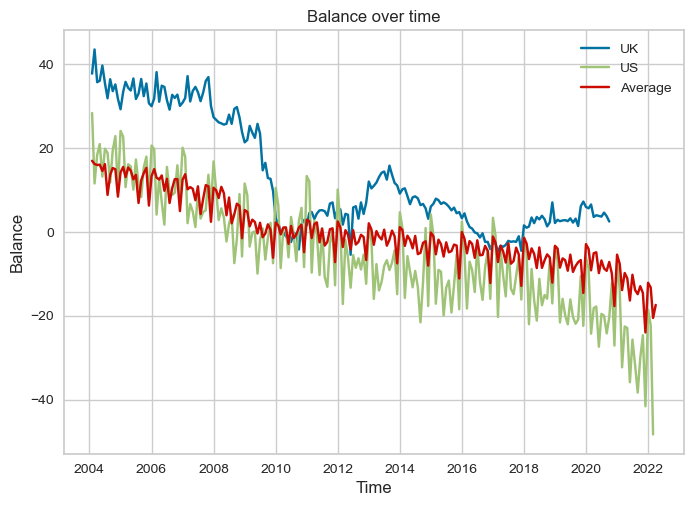

In [61]:
plt.plot(market_df['Date - Index 2010=100 (if not otherwise noted)'], market_df['UK_Balance'], label='UK')
plt.plot(market_df['Date - Index 2010=100 (if not otherwise noted)'], market_df['US_Balance'], label='US')

plt.plot(market_df['Date - Index 2010=100 (if not otherwise noted)'], market_df['Average_Balance'], label='Average')

# Add more lines as needed

plt.title('Balance over time')
plt.xlabel('Time')
plt.ylabel('Balance')
plt.legend()
plt.show()

In [62]:
#Show only the columns with missing values
market_df.isnull().sum()[market_df.isnull().sum() > 0]


Production Index Machinery & Electricals - Switzerland             1
Shipments Index Machinery & Electricals - Switzerland              1
Shipments Index Machinery & Electricals - United Kingdom          18
Shipments Index Machinery & Electricals - United States            1
Producer Prices, Electrical equipment - United Kingdom            18
Producer Prices, Electrical equipment - France                    35
Producer Prices, Electrical equipment - China                     23
Production Index, Machinery and equipment n.e.c. - Switzerland     1
Production Index, Electrical equipment - zWorld                   11
Production Index, Electrical equipment - Switzerland               1
SWI_Balance                                                        1
UK_Balance                                                        18
US_Balance                                                         1
dtype: int64

In [63]:
#market_df.fillna(0, inplace=True)

### After making visualizations to see the evolution of the Balances while considering nans as 0, it disrupted the flow of the evolution so we decided to not fill the nans yet

In [64]:
market_df.fillna(0, inplace=True)

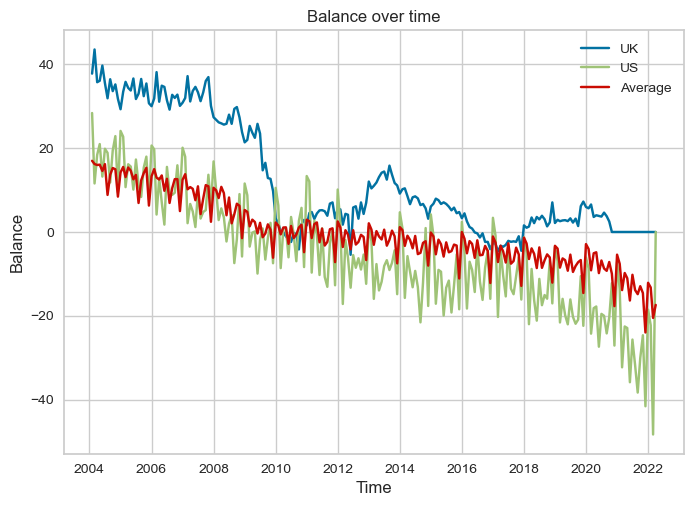

In [65]:
plt.plot(market_df['Date - Index 2010=100 (if not otherwise noted)'], market_df['UK_Balance'], label='UK')
plt.plot(market_df['Date - Index 2010=100 (if not otherwise noted)'], market_df['US_Balance'], label='US')

plt.plot(market_df['Date - Index 2010=100 (if not otherwise noted)'], market_df['Average_Balance'], label='Average')

# Add more lines as needed

plt.title('Balance over time')
plt.xlabel('Time')
plt.ylabel('Balance')
plt.legend()
plt.show()

In [66]:
#market_df_balance = market_df['CHN_Balance','FRA_Balance','GER_Balance','ITA_Balance','JAP_Balance','SWI_Balance','UK_Balance','US_Balance','EUR_Balance']

In [67]:
#create a new df with 'CHN_Balance','FRA_Balance','GER_Balance','ITA_Balance','JAP_Balance','SWI_Balance','UK_Balance','US_Balance','EUR_Balance'


# Outliers

## Visualization

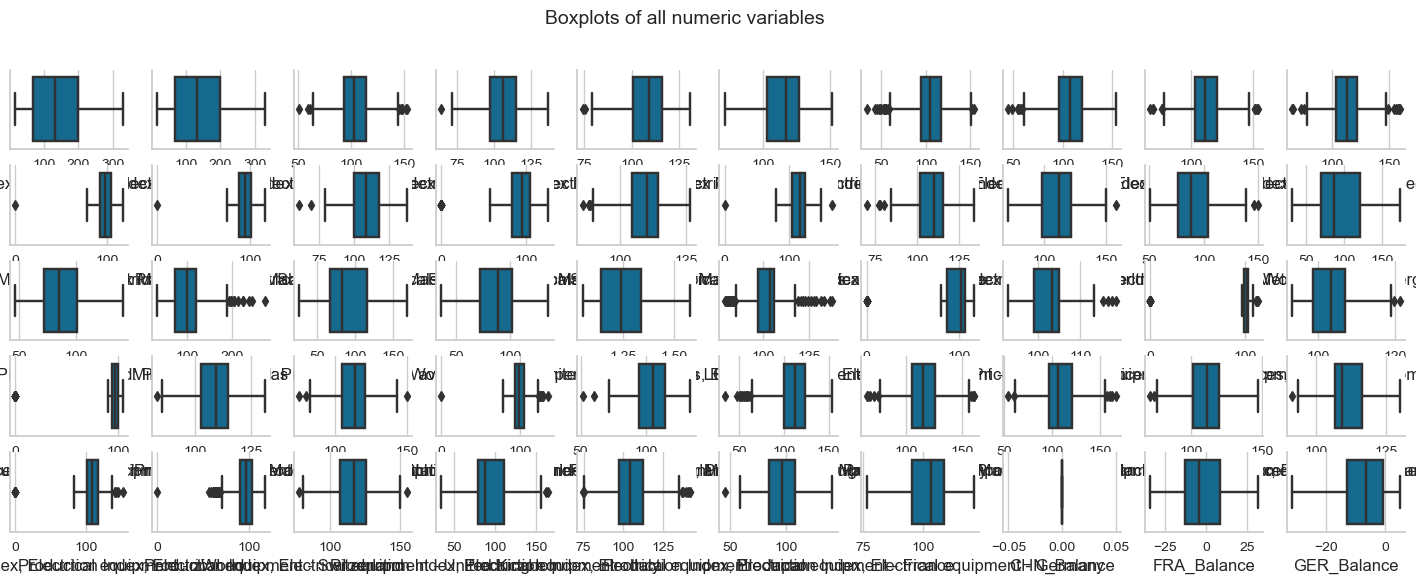

In [68]:
#Put all the numerical columns in a list
numerical_columns = market_df.select_dtypes(include=[np.number]).columns.tolist()

# Draw
fig, ax = plt.subplots(5, 10, figsize=(18,6))
for var, subplot in zip(numerical_columns, ax.flatten()):
    g = sns.boxplot(data=market_df,
                 x=var,
                 ax=subplot)

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Boxplots of all numeric variables", fontsize=plots_Title_fontSize);

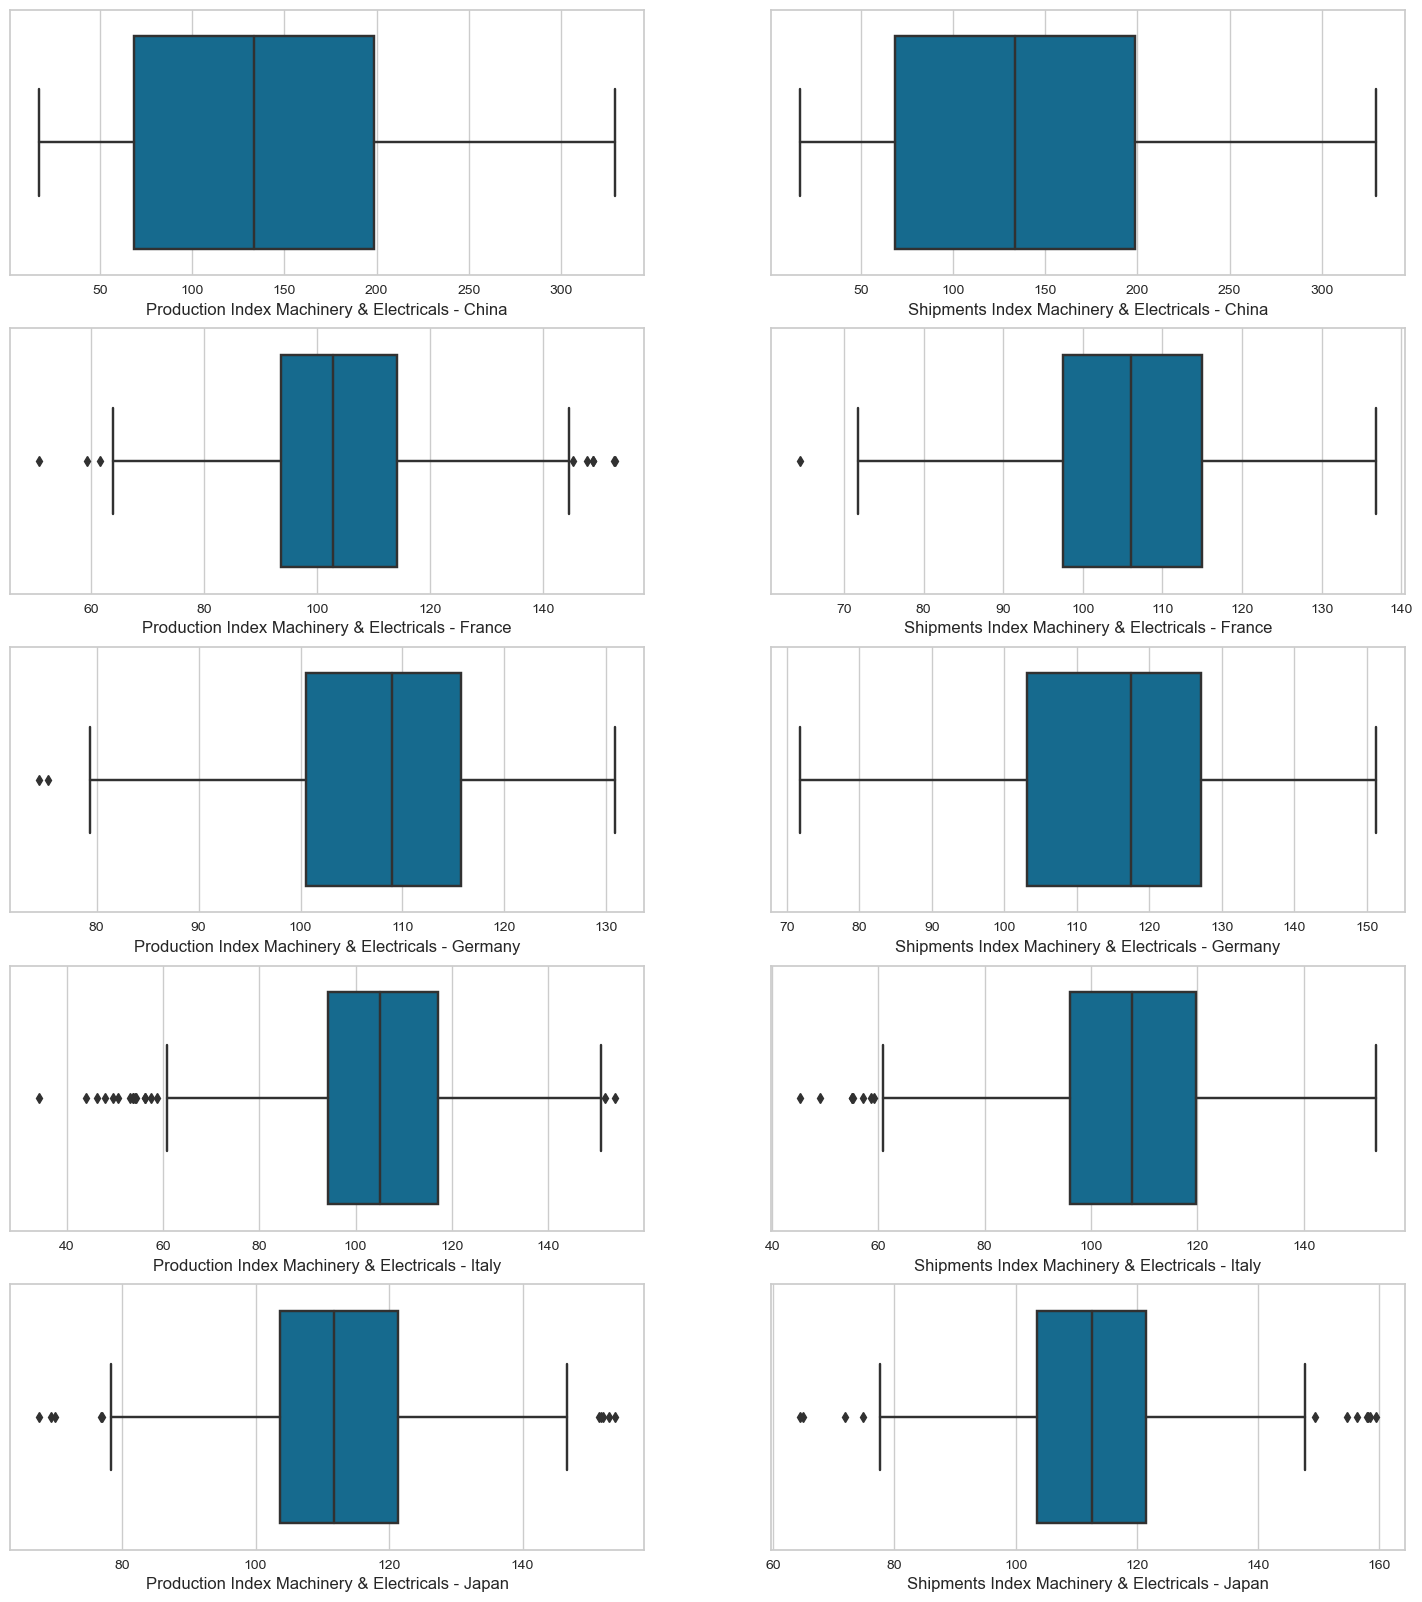

In [69]:
#Now we'll divide them to better visualize the box plots
#Do the box plot for the first 10 numerical columns
fig, ax = plt.subplots(5, 2, figsize=(18,20))
for var, subplot in zip(numerical_columns[:10], ax.flatten()):
    g = sns.boxplot(data=market_df,
                 x=var,
                 ax=subplot)

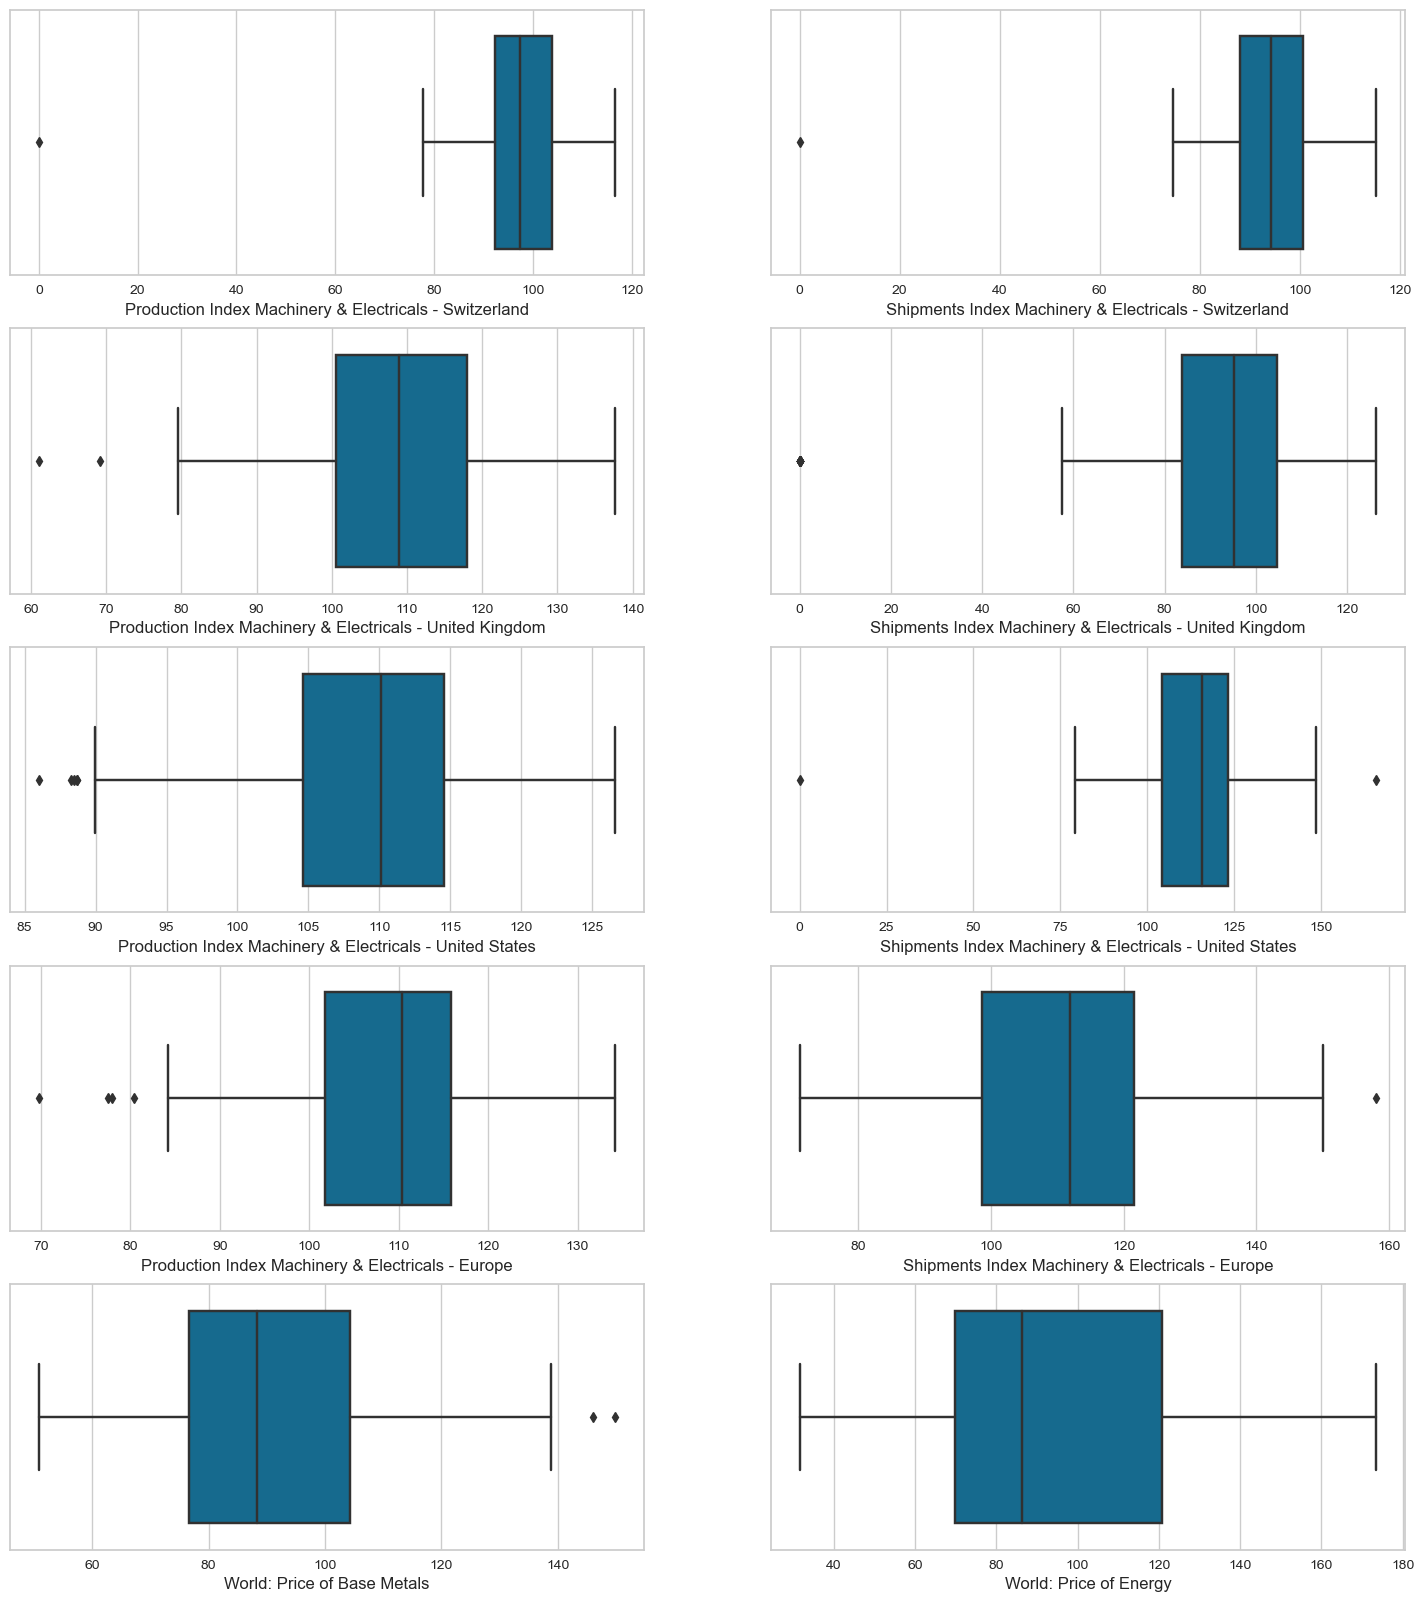

In [70]:
fig, ax = plt.subplots(5, 2, figsize=(18,20))
for var, subplot in zip(numerical_columns[10:20], ax.flatten()):
    g = sns.boxplot(data=market_df,
                 x=var,
                 ax=subplot)

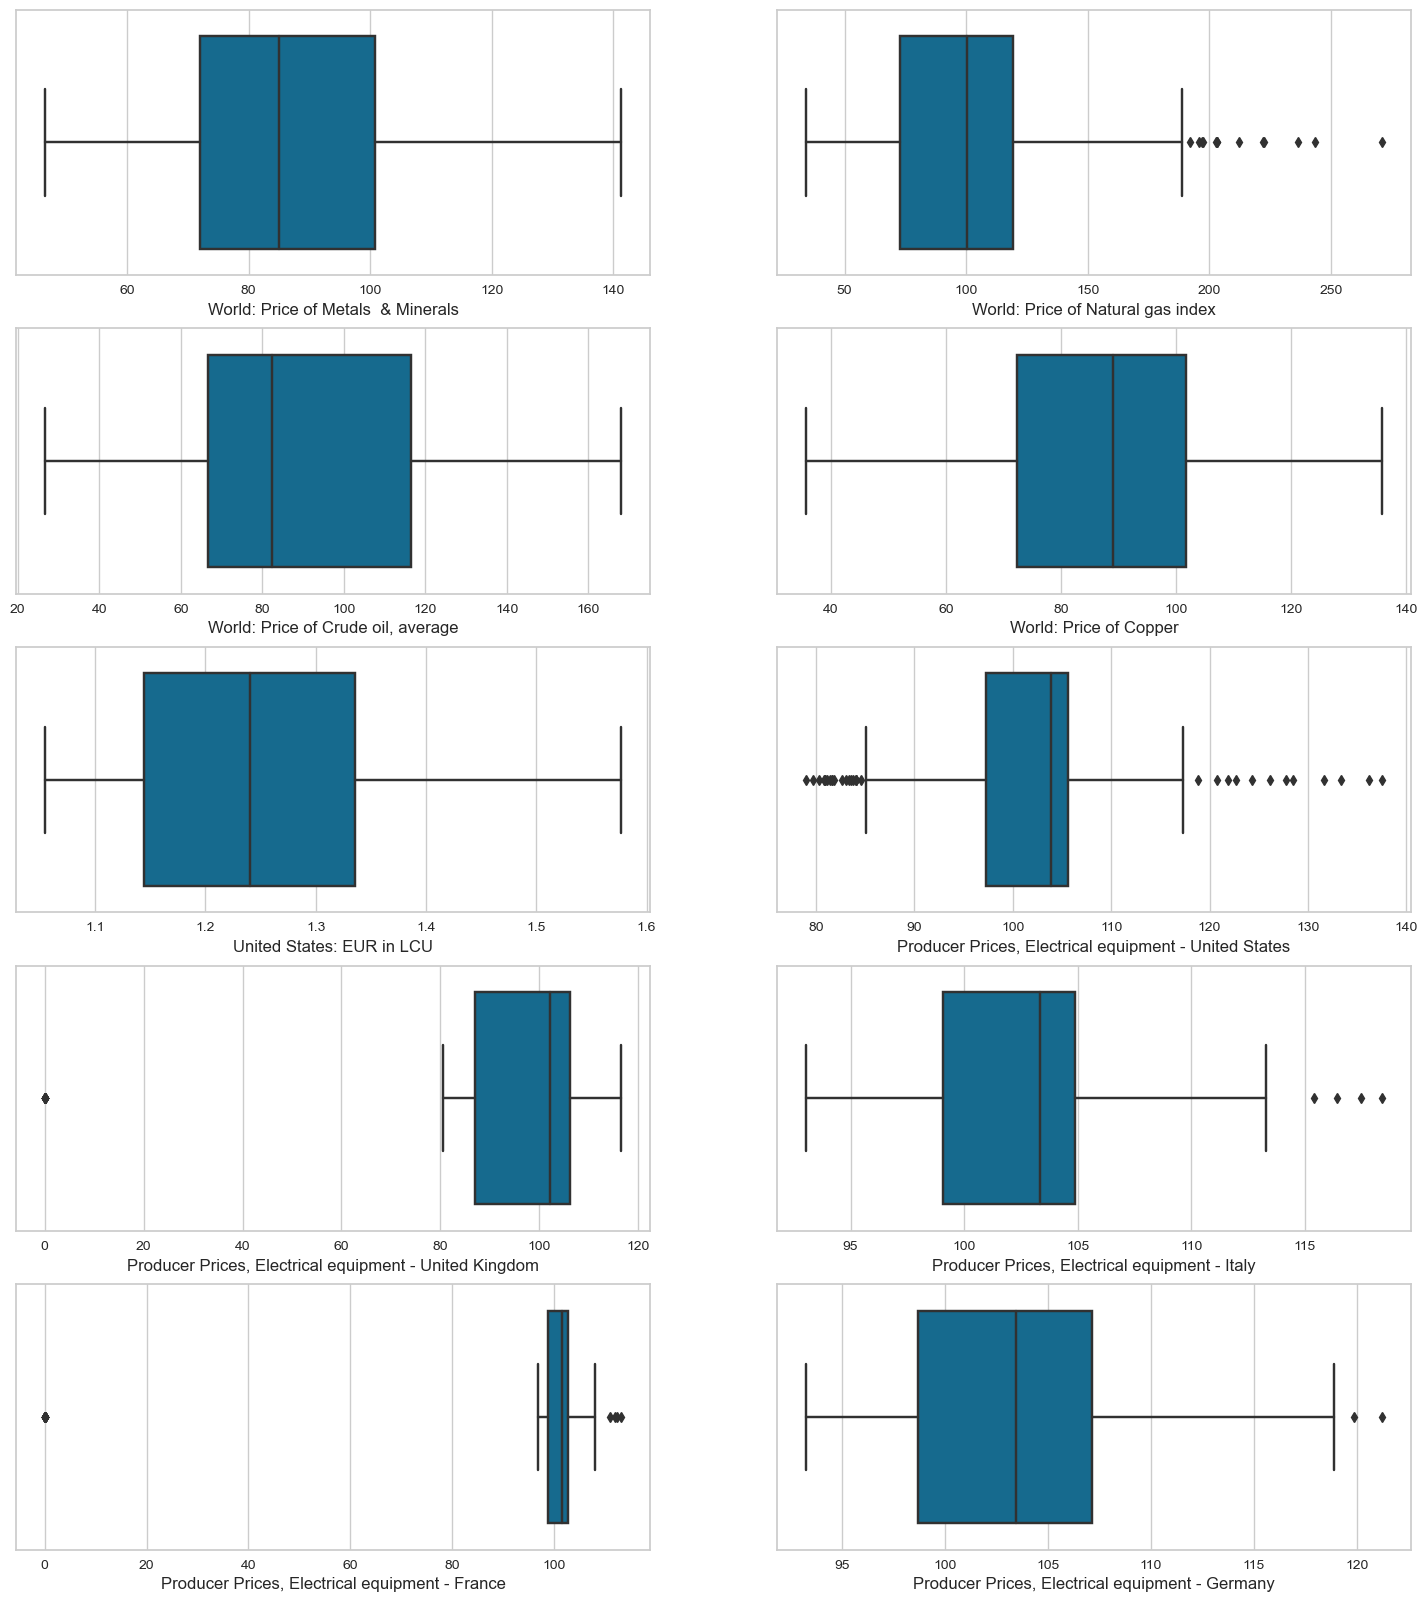

In [71]:
fig, ax = plt.subplots(5, 2, figsize=(18,20))
for var, subplot in zip(numerical_columns[20:30], ax.flatten()):
    g = sns.boxplot(data=market_df,
                 x=var,
                 ax=subplot)

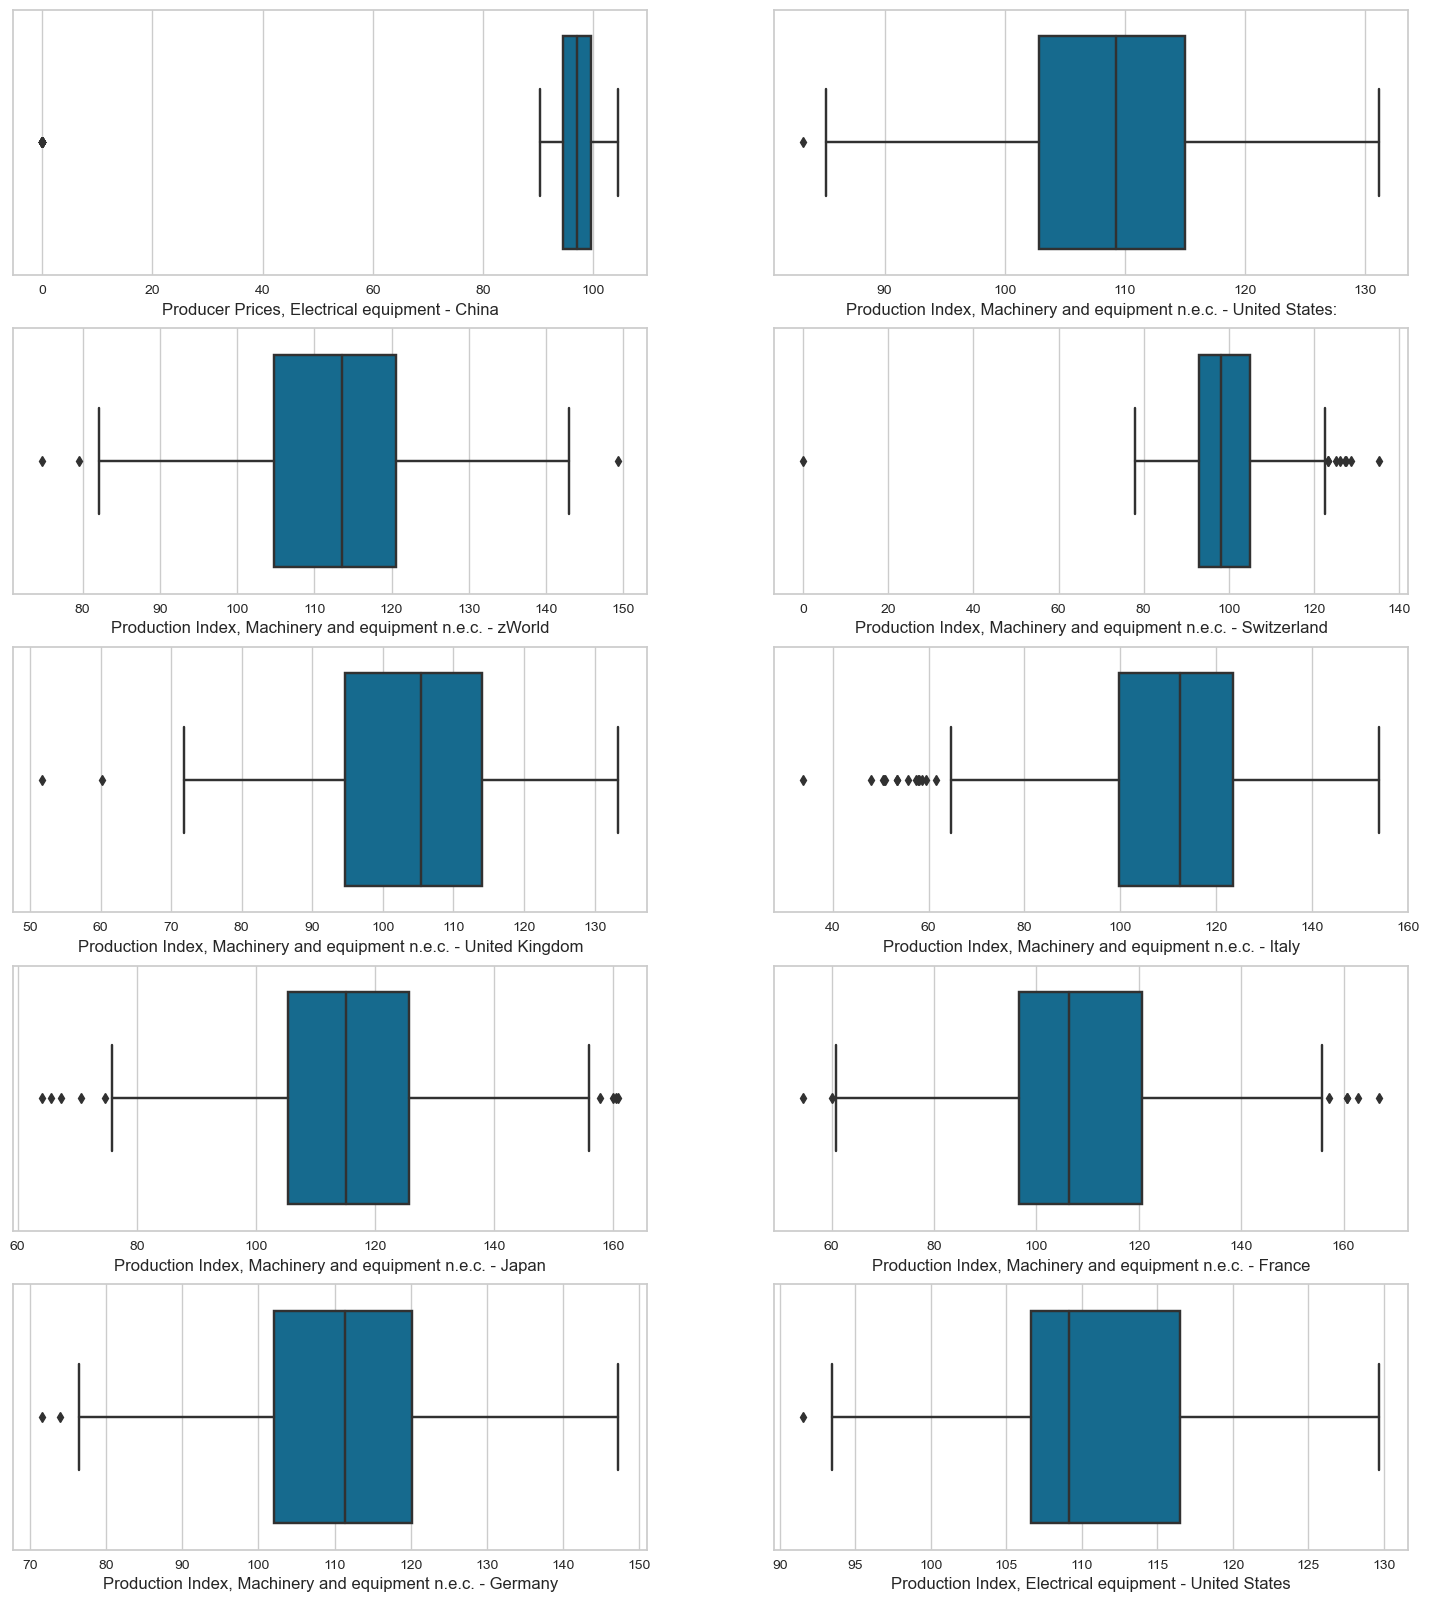

In [72]:
fig, ax = plt.subplots(5, 2, figsize=(18,20))
for var, subplot in zip(numerical_columns[30:40], ax.flatten()):
    g = sns.boxplot(data=market_df,
                 x=var,
                 ax=subplot)

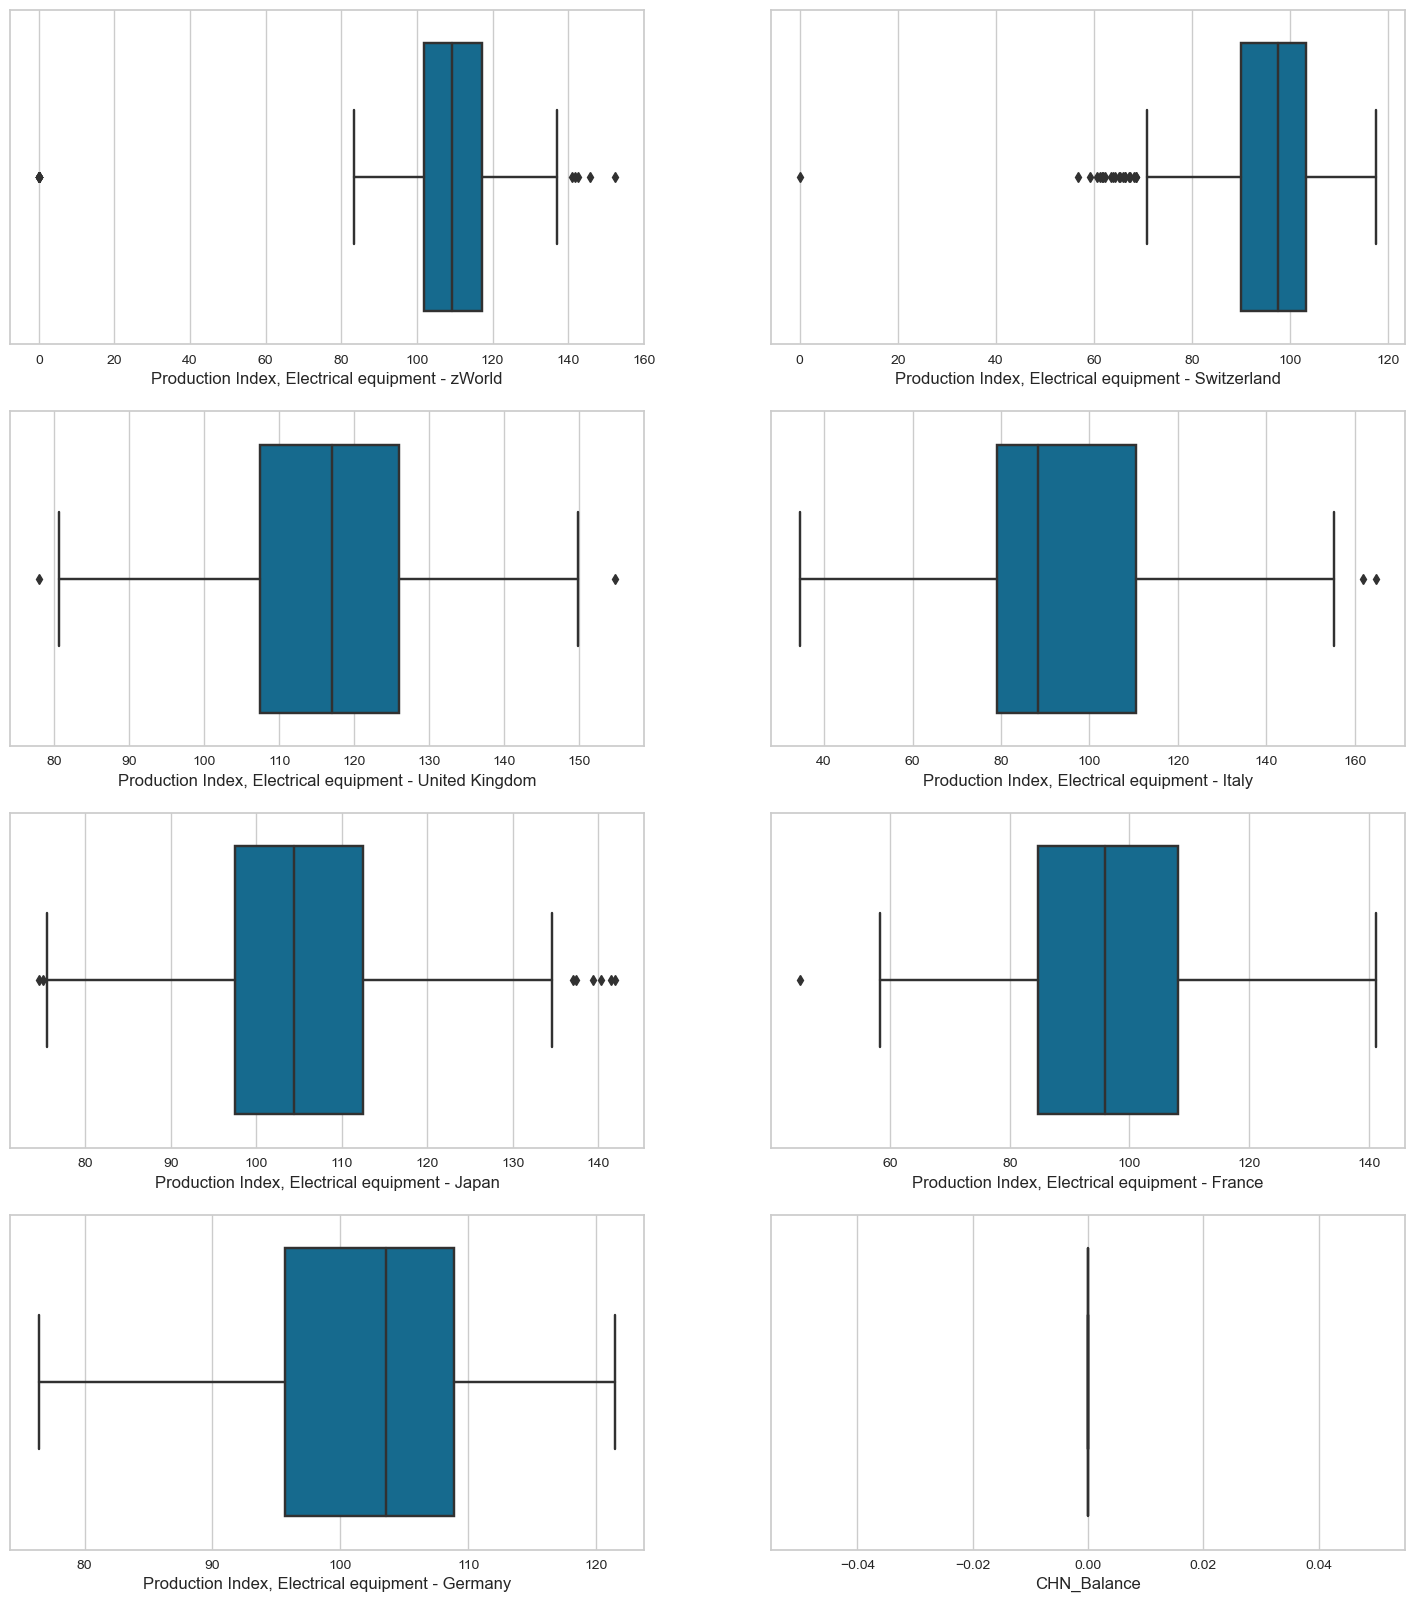

In [73]:
fig, ax = plt.subplots(4, 2, figsize=(18,20))
for var, subplot in zip(numerical_columns[40:48], ax.flatten()):
    g = sns.boxplot(data=market_df,
                 x=var,
                 ax=subplot)

In [74]:
market_df.shape

(219, 58)

### Not a lot of values so we should only remove the extreme outliers(and maybe not)

### And they are at constant prices of 2010, meaning it provides a more accurate comparison of prices over time, but doesnt necesserly disconsider 100% of the inflation effect

# Delete all data prior to 2010?

# 93% das sales são por 3 produtos

In [75]:
# 0 e nao aparecer valor é igual
# slides - enfase na data preparation

# removeram produtos dificeis de prever e faceis de prever

# year end final de setembro, incentivo de fazer melhor no final (target and bonus), september wonder

# os produtos n precisam de ser vendidos todos os dias ou até periodos

# pode haver produtos descontinuados ou produtos q so comecaram a ser vendidos a meio

# returns

# precos n mudam num tempo especifico

# varios tipos de descontos, por ex acumular e dps descontar

# small specific datasets -> outperform

# prever para cada produto num só notebook (siemens) (filip)

In [76]:
test_df.head()

,Month Year,Mapped_GCK,Sales_EUR
0,Mai 22,#3,NaN
1,Jun 22,#3,NaN
2,Jul 22,#3,NaN
3,Aug 22,#3,NaN
4,Sep 22,#3,NaN


In [77]:
test_df.tail()

,Month Year,Mapped_GCK,Sales_EUR
135,Okt 22,#1,NaN
136,Nov 22,#1,NaN
137,Dez 22,#1,NaN
138,Jan 23,#1,NaN
139,Feb 23,#1,NaN


In [78]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month Year  140 non-null    object 
 1   Mapped_GCK  140 non-null    object 
 2   Sales_EUR   0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 3.4+ KB


In [79]:
test_df['Month Year'] = test_df['Month Year'].str.replace('Jan 23', '2023-01-01')
test_df['Month Year'] = test_df['Month Year'].str.replace('Feb 23', '2023-02-01')
test_df['Month Year'] = test_df['Month Year'].str.replace('Mai 22', '2022-05-01')
test_df['Month Year'] = test_df['Month Year'].str.replace('Jun 22', '2022-06-01')
test_df['Month Year'] = test_df['Month Year'].str.replace('Jul 22', '2022-07-01')
test_df['Month Year'] = test_df['Month Year'].str.replace('Aug 22', '2022-08-01')
test_df['Month Year'] = test_df['Month Year'].str.replace('Sep 22', '2022-09-01')
test_df['Month Year'] = test_df['Month Year'].str.replace('Okt 22', '2022-10-01')
test_df['Month Year'] = test_df['Month Year'].str.replace('Nov 22', '2022-11-01')
test_df['Month Year'] = test_df['Month Year'].str.replace('Dez 22', '2022-12-01')



In [80]:
test_df.head()

,Month Year,Mapped_GCK,Sales_EUR
0,2022-05-01,#3,NaN
1,2022-06-01,#3,NaN
2,2022-07-01,#3,NaN
3,2022-08-01,#3,NaN
4,2022-09-01,#3,NaN


In [81]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month Year  140 non-null    object 
 1   Mapped_GCK  140 non-null    object 
 2   Sales_EUR   0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 3.4+ KB


In [82]:
test_df['Month Year'] = pd.to_datetime(test_df['Month Year'])
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month Year  140 non-null    datetime64[ns]
 1   Mapped_GCK  140 non-null    object        
 2   Sales_EUR   0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 3.4+ KB


In [83]:
market_df.head()

,Date - Index 2010=100 (if not otherwise noted),Production Index Machinery & Electricals - China,Shipments Index Machinery & Electricals - China,Production Index Machinery & Electricals - France,Shipments Index Machinery & Electricals - France,Production Index Machinery & Electricals - Germany,Shipments Index Machinery & Electricals - Germany,Production Index Machinery & Electricals - Italy,Shipments Index Machinery & Electricals - Italy,Production Index Machinery & Electricals - Japan,...,CHN_Balance,FRA_Balance,GER_Balance,ITA_Balance,JAP_Balance,SWI_Balance,UK_Balance,US_Balance,EUR_Balance,Average_Balance
1,2004-02-01,16.94,16.94,112.09,83.46,82.62,79.45,124.29,86.56,109.33,...,0.00,28.63,3.17,37.73,-1.16,1.23,37.75,28.36,17.02,16.97
2,2004-03-01,23.71,23.71,136.33,106.17,100.56,97.01,143.41,106.34,140.88,...,0.00,30.16,3.54,37.07,-3.80,5.98,43.51,11.57,17.77,16.20
3,2004-04-01,24.44,24.44,117.79,92.01,89.65,84.93,129.08,95.58,105.85,...,0.00,25.78,4.72,33.50,3.20,5.88,35.71,18.39,16.55,15.97
4,2004-05-01,23.71,23.71,109.00,85.70,86.88,82.37,135.59,100.09,101.86,...,0.00,23.31,4.51,35.50,1.56,5.78,36.05,20.96,16.79,16.05
5,2004-06-01,27.01,27.01,133.79,106.64,99.01,95.11,136.42,110.89,120.33,...,0.00,27.14,3.90,25.54,0.72,5.68,39.68,13.21,15.09,14.55


In [84]:
market_df.tail()

,Date - Index 2010=100 (if not otherwise noted),Production Index Machinery & Electricals - China,Shipments Index Machinery & Electricals - China,Production Index Machinery & Electricals - France,Shipments Index Machinery & Electricals - France,Production Index Machinery & Electricals - Germany,Shipments Index Machinery & Electricals - Germany,Production Index Machinery & Electricals - Italy,Shipments Index Machinery & Electricals - Italy,Production Index Machinery & Electricals - Japan,...,CHN_Balance,FRA_Balance,GER_Balance,ITA_Balance,JAP_Balance,SWI_Balance,UK_Balance,US_Balance,EUR_Balance,Average_Balance
215,2021-12-01,310.76,310.76,100.57,134.59,118.10,149.36,94.01,150.48,127.77,...,0.00,-34.02,-31.26,-56.48,-3.26,1.88,0.00,-41.55,-26.97,-23.96
216,2022-01-01,235.96,235.96,85.74,108.16,94.55,120.35,86.85,101.26,110.46,...,0.00,-22.41,-25.80,-14.41,-0.36,1.80,0.00,-18.51,-17.14,-12.11
217,2022-02-01,235.96,235.96,90.60,117.72,103.99,129.38,106.58,120.96,117.88,...,0.00,-27.11,-25.40,-14.37,-0.42,1.71,0.00,-22.22,-18.00,-13.23
218,2022-03-01,329.41,329.41,107.84,136.86,121.31,151.20,124.64,153.65,152.00,...,0.00,-29.02,-29.89,-29.01,-4.40,1.62,0.00,-48.27,-24.92,-20.49
219,2022-04-01,267.37,267.37,87.70,116.53,99.52,127.02,103.56,128.73,114.26,...,0.00,-28.83,-27.50,-25.18,-0.75,0.00,0.00,0.00,-22.03,-17.38


In [85]:
sales_df.head()

,DATE,Mapped_GCK,Sales_EUR,Month,Year,NewDate
0,2018-10-01,#1,0.00,10,2018,2018-10
1,2018-10-02,#1,0.00,10,2018,2018-10
2,2018-10-03,#1,0.00,10,2018,2018-10
3,2018-10-04,#1,0.00,10,2018,2018-10
4,2018-10-05,#1,0.00,10,2018,2018-10


In [86]:
sales_df.tail()

,DATE,Mapped_GCK,Sales_EUR,Month,Year,NewDate
9797,2019-08-23,#12,0.00,8,2019,2019-08
9798,2019-08-23,#36,1015.00,8,2019,2019-08
9799,2019-08-12,#12,0.00,8,2019,2019-08
9800,2019-08-28,#8,43763.91,8,2019,2019-08
9801,2019-08-27,#8,0.00,8,2019,2019-08


In [87]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        9802 non-null   datetime64[ns]
 1   Mapped_GCK  9802 non-null   object        
 2   Sales_EUR   9802 non-null   float64       
 3   Month       9802 non-null   int64         
 4   Year        9802 non-null   int64         
 5   NewDate     9802 non-null   period[M]     
dtypes: datetime64[ns](1), float64(1), int64(2), object(1), period[M](1)
memory usage: 459.6+ KB


In [88]:
grouped_sales_df = sales_df.groupby(['DATE', 'Mapped_GCK']).sum()
grouped_sales_df.head()


C:\Users\Estevao\AppData\Local\Temp\ipykernel_7800\255250803.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_sales_df = sales_df.groupby(['DATE', 'Mapped_GCK']).sum()


Sales_EUR  Month  Year
DATE       Mapped_GCK                        
2018-10-01 #1               0.00     10  2018
           #11              0.00     10  2018
           #12              0.00     10  2018
           #16              0.00     10  2018
           #3               0.00     10  2018

In [89]:
grouped_sales_df = grouped_sales_df.drop(['Month', 'Year'], axis=1)


In [90]:
grouped_sales_df = grouped_sales_df.reset_index()
grouped_sales_df.head()



,DATE,Mapped_GCK,Sales_EUR
0,2018-10-01,#1,0.00
1,2018-10-01,#11,0.00
2,2018-10-01,#12,0.00
3,2018-10-01,#16,0.00
4,2018-10-01,#3,0.00


In [91]:
grouped_sales_df.head(15)


,DATE,Mapped_GCK,Sales_EUR
0,2018-10-01,#1,0.00
1,2018-10-01,#11,0.00
2,2018-10-01,#12,0.00
3,2018-10-01,#16,0.00
4,2018-10-01,#3,0.00
5,2018-10-01,#4,0.00
6,2018-10-01,#5,0.00
7,2018-10-01,#6,0.00
8,2018-10-01,#8,0.00
9,2018-10-02,#1,0.00


In [92]:
grouped_sales_df.tail()

,DATE,Mapped_GCK,Sales_EUR
9797,2022-04-29,#9,1653.00
9798,2022-04-30,#1,0.00
9799,2022-04-30,#3,0.00
9800,2022-04-30,#4,0.00
9801,2022-04-30,#5,0.00


In [93]:
grouped_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        9802 non-null   datetime64[ns]
 1   Mapped_GCK  9802 non-null   object        
 2   Sales_EUR   9802 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 229.9+ KB


# AQUI

In [94]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 1 to 219
Data columns (total 58 columns):
 #   Column                                                             Non-Null Count  Dtype         
---  ------                                                             --------------  -----         
 0   Date - Index 2010=100 (if not otherwise noted)                     219 non-null    datetime64[ns]
 1   Production Index Machinery & Electricals - China                   219 non-null    float64       
 2   Shipments Index Machinery & Electricals - China                    219 non-null    float64       
 3   Production Index Machinery & Electricals - France                  219 non-null    float64       
 4   Shipments Index Machinery & Electricals - France                   219 non-null    float64       
 5   Production Index Machinery & Electricals - Germany                 219 non-null    float64       
 6   Shipments Index Machinery & Electricals - Germany                 

# Since on the sales data we only have the sales from 2018 forward we will only use the data from the corresponding Date

In [95]:
# Convert the 'Date - Index 2010=100 (if not otherwise noted)' column to datetime
market_df['Date - Index 2010=100 (if not otherwise noted)'] = pd.to_datetime(market_df['Date - Index 2010=100 (if not otherwise noted)'])

# Drop all rows prior to 2018-10-01
market_df = market_df[market_df['Date - Index 2010=100 (if not otherwise noted)'] >= '2018-10-01']


In [96]:
market_df.head()

,Date - Index 2010=100 (if not otherwise noted),Production Index Machinery & Electricals - China,Shipments Index Machinery & Electricals - China,Production Index Machinery & Electricals - France,Shipments Index Machinery & Electricals - France,Production Index Machinery & Electricals - Germany,Shipments Index Machinery & Electricals - Germany,Production Index Machinery & Electricals - Italy,Shipments Index Machinery & Electricals - Italy,Production Index Machinery & Electricals - Japan,...,CHN_Balance,FRA_Balance,GER_Balance,ITA_Balance,JAP_Balance,SWI_Balance,UK_Balance,US_Balance,EUR_Balance,Average_Balance
177,2018-10-01,211.96,211.96,108.28,122.45,124.23,137.74,118.35,122.46,125.21,...,0.00,-14.17,-13.51,-4.11,0.42,4.48,1.34,-15.91,-6.60,-5.34
178,2018-11-01,220.52,220.52,99.64,115.96,127.40,142.73,107.72,120.13,122.62,...,0.00,-16.32,-15.33,-12.41,-0.67,4.59,2.29,-6.80,-9.86,-6.06
179,2018-12-01,241.85,241.85,94.69,115.13,120.52,141.41,88.78,131.94,122.99,...,0.00,-20.44,-20.89,-43.15,-1.52,4.69,7.05,-17.02,-17.40,-12.08
180,2019-01-01,175.67,175.67,90.14,108.33,104.78,118.70,99.28,92.42,105.51,...,0.00,-18.18,-13.93,6.86,-0.79,4.46,2.14,-3.53,-6.64,-3.29
181,2019-02-01,175.67,175.67,92.55,108.94,109.60,122.69,104.59,103.21,114.47,...,0.00,-16.39,-13.09,1.37,-0.53,4.23,2.91,-6.92,-7.28,-3.97


In [97]:
# Rename the column
market_df = market_df.rename(columns={"Date - Index 2010=100 (if not otherwise noted)": "DATE"})
market_df.head()


,DATE,Production Index Machinery & Electricals - China,Shipments Index Machinery & Electricals - China,Production Index Machinery & Electricals - France,Shipments Index Machinery & Electricals - France,Production Index Machinery & Electricals - Germany,Shipments Index Machinery & Electricals - Germany,Production Index Machinery & Electricals - Italy,Shipments Index Machinery & Electricals - Italy,Production Index Machinery & Electricals - Japan,...,CHN_Balance,FRA_Balance,GER_Balance,ITA_Balance,JAP_Balance,SWI_Balance,UK_Balance,US_Balance,EUR_Balance,Average_Balance
177,2018-10-01,211.96,211.96,108.28,122.45,124.23,137.74,118.35,122.46,125.21,...,0.00,-14.17,-13.51,-4.11,0.42,4.48,1.34,-15.91,-6.60,-5.34
178,2018-11-01,220.52,220.52,99.64,115.96,127.40,142.73,107.72,120.13,122.62,...,0.00,-16.32,-15.33,-12.41,-0.67,4.59,2.29,-6.80,-9.86,-6.06
179,2018-12-01,241.85,241.85,94.69,115.13,120.52,141.41,88.78,131.94,122.99,...,0.00,-20.44,-20.89,-43.15,-1.52,4.69,7.05,-17.02,-17.40,-12.08
180,2019-01-01,175.67,175.67,90.14,108.33,104.78,118.70,99.28,92.42,105.51,...,0.00,-18.18,-13.93,6.86,-0.79,4.46,2.14,-3.53,-6.64,-3.29
181,2019-02-01,175.67,175.67,92.55,108.94,109.60,122.69,104.59,103.21,114.47,...,0.00,-16.39,-13.09,1.37,-0.53,4.23,2.91,-6.92,-7.28,-3.97


In [98]:
market_df = market_df.rename(columns={"Date - Index 2010=100 (if not otherwise noted)": "DATE"})

In [99]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 177 to 219
Data columns (total 58 columns):
 #   Column                                                             Non-Null Count  Dtype         
---  ------                                                             --------------  -----         
 0   DATE                                                               43 non-null     datetime64[ns]
 1   Production Index Machinery & Electricals - China                   43 non-null     float64       
 2   Shipments Index Machinery & Electricals - China                    43 non-null     float64       
 3   Production Index Machinery & Electricals - France                  43 non-null     float64       
 4   Shipments Index Machinery & Electricals - France                   43 non-null     float64       
 5   Production Index Machinery & Electricals - Germany                 43 non-null     float64       
 6   Shipments Index Machinery & Electricals - Germany                

In [100]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        9802 non-null   datetime64[ns]
 1   Mapped_GCK  9802 non-null   object        
 2   Sales_EUR   9802 non-null   float64       
 3   Month       9802 non-null   int64         
 4   Year        9802 non-null   int64         
 5   NewDate     9802 non-null   period[M]     
dtypes: datetime64[ns](1), float64(1), int64(2), object(1), period[M](1)
memory usage: 459.6+ KB


# New Dataset

In [101]:
# Assuming there is a dataframe named sales_df which is not listed in the variables
# Merge the two dataframes on the common column. If there is no common column, change 'common_column' to the appropriate column name
final_dataset = pd.merge(market_df, grouped_sales_df, on='DATE')


In [102]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 0 to 278
Data columns (total 60 columns):
 #   Column                                                             Non-Null Count  Dtype         
---  ------                                                             --------------  -----         
 0   DATE                                                               279 non-null    datetime64[ns]
 1   Production Index Machinery & Electricals - China                   279 non-null    float64       
 2   Shipments Index Machinery & Electricals - China                    279 non-null    float64       
 3   Production Index Machinery & Electricals - France                  279 non-null    float64       
 4   Shipments Index Machinery & Electricals - France                   279 non-null    float64       
 5   Production Index Machinery & Electricals - Germany                 279 non-null    float64       
 6   Shipments Index Machinery & Electricals - Germany                 

In [103]:
final_dataset.head()

,DATE,Production Index Machinery & Electricals - China,Shipments Index Machinery & Electricals - China,Production Index Machinery & Electricals - France,Shipments Index Machinery & Electricals - France,Production Index Machinery & Electricals - Germany,Shipments Index Machinery & Electricals - Germany,Production Index Machinery & Electricals - Italy,Shipments Index Machinery & Electricals - Italy,Production Index Machinery & Electricals - Japan,...,GER_Balance,ITA_Balance,JAP_Balance,SWI_Balance,UK_Balance,US_Balance,EUR_Balance,Average_Balance,Mapped_GCK,Sales_EUR
0,2018-10-01,211.96,211.96,108.28,122.45,124.23,137.74,118.35,122.46,125.21,...,-13.51,-4.11,0.42,4.48,1.34,-15.91,-6.60,-5.34,#1,0.00
1,2018-10-01,211.96,211.96,108.28,122.45,124.23,137.74,118.35,122.46,125.21,...,-13.51,-4.11,0.42,4.48,1.34,-15.91,-6.60,-5.34,#11,0.00
2,2018-10-01,211.96,211.96,108.28,122.45,124.23,137.74,118.35,122.46,125.21,...,-13.51,-4.11,0.42,4.48,1.34,-15.91,-6.60,-5.34,#12,0.00
3,2018-10-01,211.96,211.96,108.28,122.45,124.23,137.74,118.35,122.46,125.21,...,-13.51,-4.11,0.42,4.48,1.34,-15.91,-6.60,-5.34,#16,0.00
4,2018-10-01,211.96,211.96,108.28,122.45,124.23,137.74,118.35,122.46,125.21,...,-13.51,-4.11,0.42,4.48,1.34,-15.91,-6.60,-5.34,#3,0.00


In [104]:
final_dataset.tail()

,DATE,Production Index Machinery & Electricals - China,Shipments Index Machinery & Electricals - China,Production Index Machinery & Electricals - France,Shipments Index Machinery & Electricals - France,Production Index Machinery & Electricals - Germany,Shipments Index Machinery & Electricals - Germany,Production Index Machinery & Electricals - Italy,Shipments Index Machinery & Electricals - Italy,Production Index Machinery & Electricals - Japan,...,GER_Balance,ITA_Balance,JAP_Balance,SWI_Balance,UK_Balance,US_Balance,EUR_Balance,Average_Balance,Mapped_GCK,Sales_EUR
274,2022-04-01,267.37,267.37,87.70,116.53,99.52,127.02,103.56,128.73,114.26,...,-27.50,-25.18,-0.75,0.00,0.00,0.00,-22.03,-17.38,#4,0.00
275,2022-04-01,267.37,267.37,87.70,116.53,99.52,127.02,103.56,128.73,114.26,...,-27.50,-25.18,-0.75,0.00,0.00,0.00,-22.03,-17.38,#5,-5000.00
276,2022-04-01,267.37,267.37,87.70,116.53,99.52,127.02,103.56,128.73,114.26,...,-27.50,-25.18,-0.75,0.00,0.00,0.00,-22.03,-17.38,#6,0.00
277,2022-04-01,267.37,267.37,87.70,116.53,99.52,127.02,103.56,128.73,114.26,...,-27.50,-25.18,-0.75,0.00,0.00,0.00,-22.03,-17.38,#8,41.00
278,2022-04-01,267.37,267.37,87.70,116.53,99.52,127.02,103.56,128.73,114.26,...,-27.50,-25.18,-0.75,0.00,0.00,0.00,-22.03,-17.38,#9,0.00


In [105]:
test_df.head()

,Month Year,Mapped_GCK,Sales_EUR
0,2022-05-01,#3,NaN
1,2022-06-01,#3,NaN
2,2022-07-01,#3,NaN
3,2022-08-01,#3,NaN
4,2022-09-01,#3,NaN


In [106]:
test_df.tail()

,Month Year,Mapped_GCK,Sales_EUR
135,2022-10-01,#1,NaN
136,2022-11-01,#1,NaN
137,2022-12-01,#1,NaN
138,2023-01-01,#1,NaN
139,2023-02-01,#1,NaN


In [107]:
grouped_sales_df.head()

,DATE,Mapped_GCK,Sales_EUR
0,2018-10-01,#1,0.00
1,2018-10-01,#11,0.00
2,2018-10-01,#12,0.00
3,2018-10-01,#16,0.00
4,2018-10-01,#3,0.00


In [108]:
grouped_sales_df.tail()

,DATE,Mapped_GCK,Sales_EUR
9797,2022-04-29,#9,1653.00
9798,2022-04-30,#1,0.00
9799,2022-04-30,#3,0.00
9800,2022-04-30,#4,0.00
9801,2022-04-30,#5,0.00


In [109]:
grouped_sales_df['DATE'] = grouped_sales_df['DATE'].dt.to_period('M')
grouped_sales = grouped_sales_df.groupby(['Mapped_GCK', 'DATE'])['Sales_EUR'].sum().reset_index()
grouped_sales.tail()


,Mapped_GCK,DATE,Sales_EUR
597,#9,2021-12,14935.20
598,#9,2022-01,2064.70
599,#9,2022-02,901.50
600,#9,2022-03,4452.60
601,#9,2022-04,3285.00


In [110]:
grouped_sales.head()

,Mapped_GCK,DATE,Sales_EUR
0,#1,2018-10,36098918.79
1,#1,2018-11,5140760.00
2,#1,2018-12,37889612.12
3,#1,2019-01,27728148.35
4,#1,2019-02,34793163.53


In [111]:
grouped_sales_by_Mapped_GCK = grouped_sales.groupby('Mapped_GCK').sum()
print(grouped_sales_by_Mapped_GCK)


               Sales_EUR
Mapped_GCK              
#1         1544205996.76
#11          65901314.65
#12           8279486.32
#13           1009156.91
#14            493822.06
#16          18391175.71
#20             78326.86
#3          533443487.70
#36            998613.91
#4           15627204.96
#5          429595158.01
#6           20641890.49
#8           34871219.82
#9             308446.51


C:\Users\Estevao\AppData\Local\Temp\ipykernel_7800\3338762691.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_sales_by_Mapped_GCK = grouped_sales.groupby('Mapped_GCK').sum()


In [112]:
# Calculate the total sales
total_sales = grouped_sales_by_Mapped_GCK['Sales_EUR'].sum()

# Calculate the percentage of sales by Mapped_GCK
grouped_sales_by_Mapped_GCK['Sales_EUR'] / total_sales * 100


Mapped_GCK
#1    57.75
#11    2.46
#12    0.31
#13    0.04
#14    0.02
#16    0.69
#20    0.00
#3    19.95
#36    0.04
#4     0.58
#5    16.07
#6     0.77
#8     1.30
#9     0.01
Name: Sales_EUR, dtype: float64

### SO prod 1, 3 and 5 are responsible for about 94% of the total sales

In [113]:
# Extract year and month from the 'DATE' column and create a new 'YearMonth' column
market_df['DATE'] = market_df['DATE'].dt.to_period('M')
market_df.head()


,DATE,Production Index Machinery & Electricals - China,Shipments Index Machinery & Electricals - China,Production Index Machinery & Electricals - France,Shipments Index Machinery & Electricals - France,Production Index Machinery & Electricals - Germany,Shipments Index Machinery & Electricals - Germany,Production Index Machinery & Electricals - Italy,Shipments Index Machinery & Electricals - Italy,Production Index Machinery & Electricals - Japan,...,CHN_Balance,FRA_Balance,GER_Balance,ITA_Balance,JAP_Balance,SWI_Balance,UK_Balance,US_Balance,EUR_Balance,Average_Balance
177,2018-10,211.96,211.96,108.28,122.45,124.23,137.74,118.35,122.46,125.21,...,0.00,-14.17,-13.51,-4.11,0.42,4.48,1.34,-15.91,-6.60,-5.34
178,2018-11,220.52,220.52,99.64,115.96,127.40,142.73,107.72,120.13,122.62,...,0.00,-16.32,-15.33,-12.41,-0.67,4.59,2.29,-6.80,-9.86,-6.06
179,2018-12,241.85,241.85,94.69,115.13,120.52,141.41,88.78,131.94,122.99,...,0.00,-20.44,-20.89,-43.15,-1.52,4.69,7.05,-17.02,-17.40,-12.08
180,2019-01,175.67,175.67,90.14,108.33,104.78,118.70,99.28,92.42,105.51,...,0.00,-18.18,-13.93,6.86,-0.79,4.46,2.14,-3.53,-6.64,-3.29
181,2019-02,175.67,175.67,92.55,108.94,109.60,122.69,104.59,103.21,114.47,...,0.00,-16.39,-13.09,1.37,-0.53,4.23,2.91,-6.92,-7.28,-3.97


In [114]:
final_dataset = pd.merge(grouped_sales, market_df, on='DATE')
final_dataset.head()

,Mapped_GCK,DATE,Sales_EUR,Production Index Machinery & Electricals - China,Shipments Index Machinery & Electricals - China,Production Index Machinery & Electricals - France,Shipments Index Machinery & Electricals - France,Production Index Machinery & Electricals - Germany,Shipments Index Machinery & Electricals - Germany,Production Index Machinery & Electricals - Italy,...,CHN_Balance,FRA_Balance,GER_Balance,ITA_Balance,JAP_Balance,SWI_Balance,UK_Balance,US_Balance,EUR_Balance,Average_Balance
0,#1,2018-10,36098918.79,211.96,211.96,108.28,122.45,124.23,137.74,118.35,...,0.00,-14.17,-13.51,-4.11,0.42,4.48,1.34,-15.91,-6.60,-5.34
1,#11,2018-10,1021303.50,211.96,211.96,108.28,122.45,124.23,137.74,118.35,...,0.00,-14.17,-13.51,-4.11,0.42,4.48,1.34,-15.91,-6.60,-5.34
2,#12,2018-10,28686.33,211.96,211.96,108.28,122.45,124.23,137.74,118.35,...,0.00,-14.17,-13.51,-4.11,0.42,4.48,1.34,-15.91,-6.60,-5.34
3,#13,2018-10,27666.10,211.96,211.96,108.28,122.45,124.23,137.74,118.35,...,0.00,-14.17,-13.51,-4.11,0.42,4.48,1.34,-15.91,-6.60,-5.34
4,#14,2018-10,5770.00,211.96,211.96,108.28,122.45,124.23,137.74,118.35,...,0.00,-14.17,-13.51,-4.11,0.42,4.48,1.34,-15.91,-6.60,-5.34


In [115]:
#a new column on final_dataset that is the Month of the DATE, and put it as the third column
final_dataset.insert(2, 'Month', final_dataset['DATE'].dt.month)
final_dataset.head()

,Mapped_GCK,DATE,Month,Sales_EUR,Production Index Machinery & Electricals - China,Shipments Index Machinery & Electricals - China,Production Index Machinery & Electricals - France,Shipments Index Machinery & Electricals - France,Production Index Machinery & Electricals - Germany,Shipments Index Machinery & Electricals - Germany,...,CHN_Balance,FRA_Balance,GER_Balance,ITA_Balance,JAP_Balance,SWI_Balance,UK_Balance,US_Balance,EUR_Balance,Average_Balance
0,#1,2018-10,10,36098918.79,211.96,211.96,108.28,122.45,124.23,137.74,...,0.00,-14.17,-13.51,-4.11,0.42,4.48,1.34,-15.91,-6.60,-5.34
1,#11,2018-10,10,1021303.50,211.96,211.96,108.28,122.45,124.23,137.74,...,0.00,-14.17,-13.51,-4.11,0.42,4.48,1.34,-15.91,-6.60,-5.34
2,#12,2018-10,10,28686.33,211.96,211.96,108.28,122.45,124.23,137.74,...,0.00,-14.17,-13.51,-4.11,0.42,4.48,1.34,-15.91,-6.60,-5.34
3,#13,2018-10,10,27666.10,211.96,211.96,108.28,122.45,124.23,137.74,...,0.00,-14.17,-13.51,-4.11,0.42,4.48,1.34,-15.91,-6.60,-5.34
4,#14,2018-10,10,5770.00,211.96,211.96,108.28,122.45,124.23,137.74,...,0.00,-14.17,-13.51,-4.11,0.42,4.48,1.34,-15.91,-6.60,-5.34


In [116]:
final_dataset['Month'].unique()

array([10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64)

In [117]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602 entries, 0 to 601
Data columns (total 61 columns):
 #   Column                                                             Non-Null Count  Dtype    
---  ------                                                             --------------  -----    
 0   Mapped_GCK                                                         602 non-null    object   
 1   DATE                                                               602 non-null    period[M]
 2   Month                                                              602 non-null    int64    
 3   Sales_EUR                                                          602 non-null    float64  
 4   Production Index Machinery & Electricals - China                   602 non-null    float64  
 5   Shipments Index Machinery & Electricals - China                    602 non-null    float64  
 6   Production Index Machinery & Electricals - France                  602 non-null    float64  
 7   Shipment

In [118]:
# Remove the '#' from 'Mapped_GCK' and convert the column to float
final_dataset['Mapped_GCK'] = final_dataset['Mapped_GCK'].str.replace('#', '').astype(float)


# Feature Selection

In [119]:
#Correlation Matrix
correlation = final_dataset.corr()
print(correlation['Sales_EUR'])

Mapped_GCK                                                          -0.46
Month                                                                0.01
Sales_EUR                                                            1.00
Production Index Machinery & Electricals - China                     0.02
Shipments Index Machinery & Electricals - China                      0.02
Production Index Machinery & Electricals - France                    0.00
Shipments Index Machinery & Electricals - France                     0.01
Production Index Machinery & Electricals - Germany                   0.01
Shipments Index Machinery & Electricals - Germany                    0.02
Production Index Machinery & Electricals - Italy                     0.00
Shipments Index Machinery & Electricals - Italy                      0.01
Production Index Machinery & Electricals - Japan                     0.01
Shipments Index Machinery & Electricals - Japan                      0.02
Production Index Machinery & Electrica

C:\Users\Estevao\AppData\Local\Temp\ipykernel_7800\3606058024.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = final_dataset.corr()


In [120]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602 entries, 0 to 601
Data columns (total 61 columns):
 #   Column                                                             Non-Null Count  Dtype    
---  ------                                                             --------------  -----    
 0   Mapped_GCK                                                         602 non-null    float64  
 1   DATE                                                               602 non-null    period[M]
 2   Month                                                              602 non-null    int64    
 3   Sales_EUR                                                          602 non-null    float64  
 4   Production Index Machinery & Electricals - China                   602 non-null    float64  
 5   Shipments Index Machinery & Electricals - China                    602 non-null    float64  
 6   Production Index Machinery & Electricals - France                  602 non-null    float64  
 7   Shipment

In [121]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Assuming final_dataset is your DataFrame, 'Sales_EUR' is the target variable,
# 'Date' is the date column, and 'Mapped_GCK' is a categorical variable

# Drop the 'Date' column
X = final_dataset.drop(['Sales_EUR', 'DATE'], axis=1)
y = final_dataset['Sales_EUR']

model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, y)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 3
Selected Features: [False False False False  True  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False]
Feature Ranking: [56 50 30 29  1  1 22 34 28 18 17 16  5 14 10 46 26 45  4  2 42 54 43 51
 55 48 35 41 47 39 52 44 49 25 40  6 11 20 31  8 23 27 38  7 12 21 32  9
 24 57  1 33 19 15 13 37 53  3 36]


In [122]:
# Get column names
column_names = X.columns

# Get selected features
selected_features = column_names[fit.support_]

print("Selected Features: %s" % (selected_features))

Selected Features: Index(['Production Index Machinery & Electricals - France',
       'Shipments Index Machinery & Electricals - France', 'FRA_Balance'],
      dtype='object')


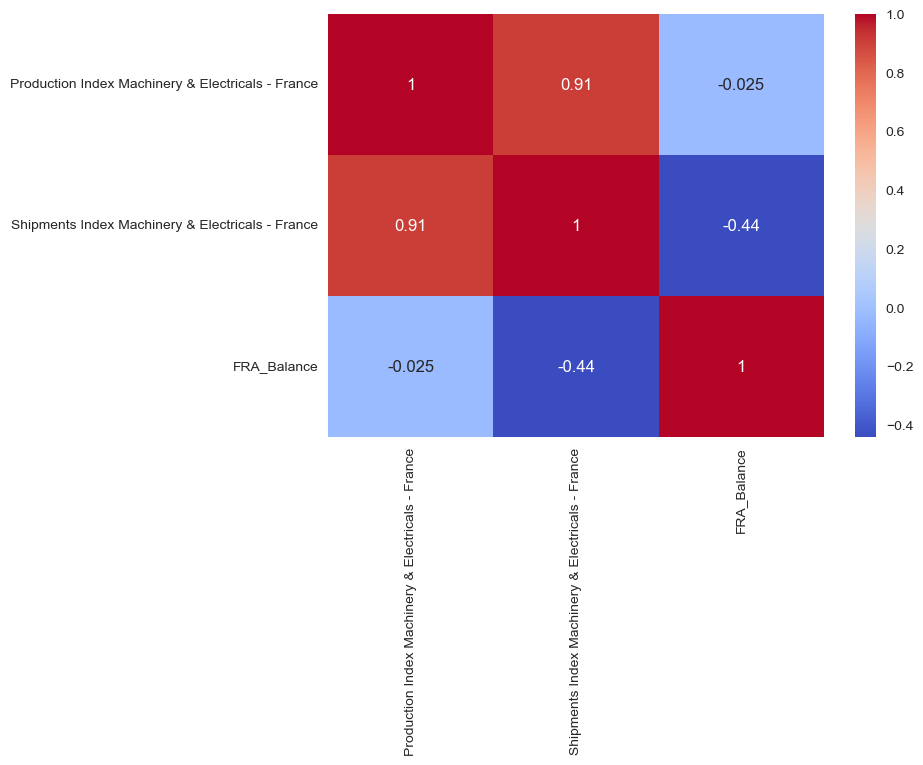

In [123]:
import seaborn as sns

# Assuming selected_features is a list of the names of the selected features
correlation = final_dataset[selected_features].corr()

# Create a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [124]:
selected_features = selected_features.drop('Shipments Index Machinery & Electricals - France')

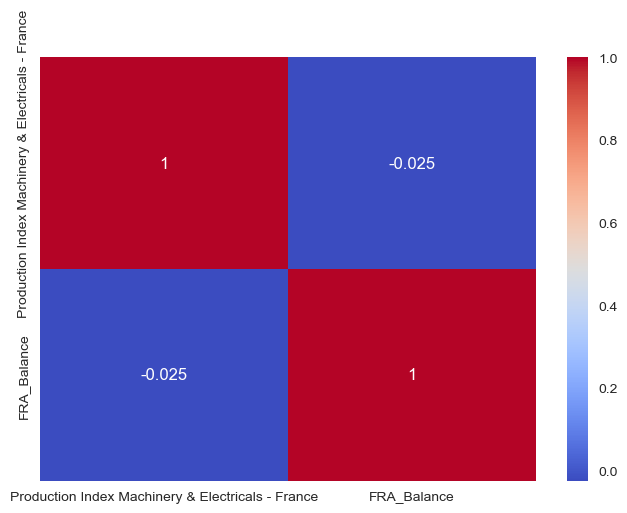

In [125]:
# Assuming selected_features is a list of the names of the selected features
correlation = final_dataset[selected_features].corr()

# Create a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [126]:
#!pip install xgboost

In [127]:
#XGBoost
from xgboost import XGBRegressor

X = final_dataset.drop(['Sales_EUR', 'DATE'], axis=1)
y = final_dataset['Sales_EUR']

model = XGBRegressor()
model.fit(X,y)
print(model.feature_importances_)

[4.4131151e-01 6.6799985e-04 8.5768651e-04 0.0000000e+00 3.2528685e-04
 4.2335456e-03 1.8376607e-01 6.1347792e-03 8.0854766e-04 1.2479641e-03
 7.8128367e-05 1.0892253e-02 3.3965677e-03 8.6128648e-04 5.9892016e-04
 4.9393578e-03 8.1371464e-04 1.9851734e-03 1.6502725e-04 1.3031897e-02
 5.3520752e-03 6.8471059e-03 2.3923921e-03 9.8030269e-03 3.1060502e-03
 2.6663207e-02 2.1023924e-02 1.1533595e-03 1.5341306e-04 6.2828362e-03
 7.6928467e-05 3.5731588e-03 1.2474848e-04 2.0362344e-03 1.3227554e-03
 7.7473742e-05 2.2122780e-02 2.2867088e-04 2.0301737e-05 2.0525599e-04
 1.0207487e-02 5.8420952e-03 6.3422313e-03 1.5786057e-02 6.8275575e-03
 1.0753361e-02 3.6258166e-04 1.1048539e-03 6.9573970e-04 0.0000000e+00
 9.4397590e-03 5.1404559e-03 3.2232616e-02 1.5500686e-02 1.0644788e-03
 2.1952842e-04 1.6204853e-02 1.0915052e-02 6.2679164e-02]


In [128]:
# Fit the model and get feature importances
model = XGBRegressor()
model.fit(X, y)
importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                                              Feature  Importance
0                                          Mapped_GCK        0.44
6   Production Index Machinery & Electricals - Ger...        0.18
58                                    Average_Balance        0.06
52                                        ITA_Balance        0.03
25                             World: Price of Copper        0.03
36  Production Index, Machinery and equipment n.e....        0.02
26                          United States: EUR in LCU        0.02
56                                         US_Balance        0.02
43  Production Index, Electrical equipment - Switz...        0.02
53                                        JAP_Balance        0.02
19   Shipments Index Machinery & Electricals - Europe        0.01
57                                        EUR_Balance        0.01
11    Shipments Index Machinery & Electricals - Japan        0.01
45     Production Index, Electrical equipment - Italy        0.01
40  Produc

In [129]:
# Select the features with importance higher than 0.01
important_features = importance_df[importance_df['Importance'] > 0.01]
important_features


,Feature,Importance
0,Mapped_GCK,0.44
6,Production Index Machinery & Electricals - Ger...,0.18
58,Average_Balance,0.06
52,ITA_Balance,0.03
25,World: Price of Copper,0.03
36,"Production Index, Machinery and equipment n.e....",0.02
26,United States: EUR in LCU,0.02
56,US_Balance,0.02
43,"Production Index, Electrical equipment - Switz...",0.02
53,JAP_Balance,0.02


In [130]:
important_list = important_features['Feature']


In [131]:
important_list

0                                            Mapped_GCK
6     Production Index Machinery & Electricals - Ger...
58                                      Average_Balance
52                                          ITA_Balance
25                               World: Price of Copper
36    Production Index, Machinery and equipment n.e....
26                            United States: EUR in LCU
56                                           US_Balance
43    Production Index, Electrical equipment - Switz...
53                                          JAP_Balance
19     Shipments Index Machinery & Electricals - Europe
57                                          EUR_Balance
11      Shipments Index Machinery & Electricals - Japan
45       Production Index, Electrical equipment - Italy
40    Production Index, Machinery and equipment n.e....
Name: Feature, dtype: object

In [132]:
# Extract the features from the importance_df DataFrame
important_features = important_list.tolist()
print(important_features)


['Mapped_GCK', 'Production Index Machinery & Electricals - Germany', 'Average_Balance', 'ITA_Balance', 'World: Price of Copper', 'Production Index, Machinery and equipment n.e.c. - United Kingdom', 'United States: EUR in LCU', 'US_Balance', 'Production Index, Electrical equipment - Switzerland', 'JAP_Balance', 'Shipments Index Machinery & Electricals - Europe', 'EUR_Balance', 'Shipments Index Machinery & Electricals - Japan', 'Production Index, Electrical equipment - Italy', 'Production Index, Machinery and equipment n.e.c. - Germany']


In [133]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602 entries, 0 to 601
Data columns (total 61 columns):
 #   Column                                                             Non-Null Count  Dtype    
---  ------                                                             --------------  -----    
 0   Mapped_GCK                                                         602 non-null    float64  
 1   DATE                                                               602 non-null    period[M]
 2   Month                                                              602 non-null    int64    
 3   Sales_EUR                                                          602 non-null    float64  
 4   Production Index Machinery & Electricals - China                   602 non-null    float64  
 5   Shipments Index Machinery & Electricals - China                    602 non-null    float64  
 6   Production Index Machinery & Electricals - France                  602 non-null    float64  
 7   Shipment

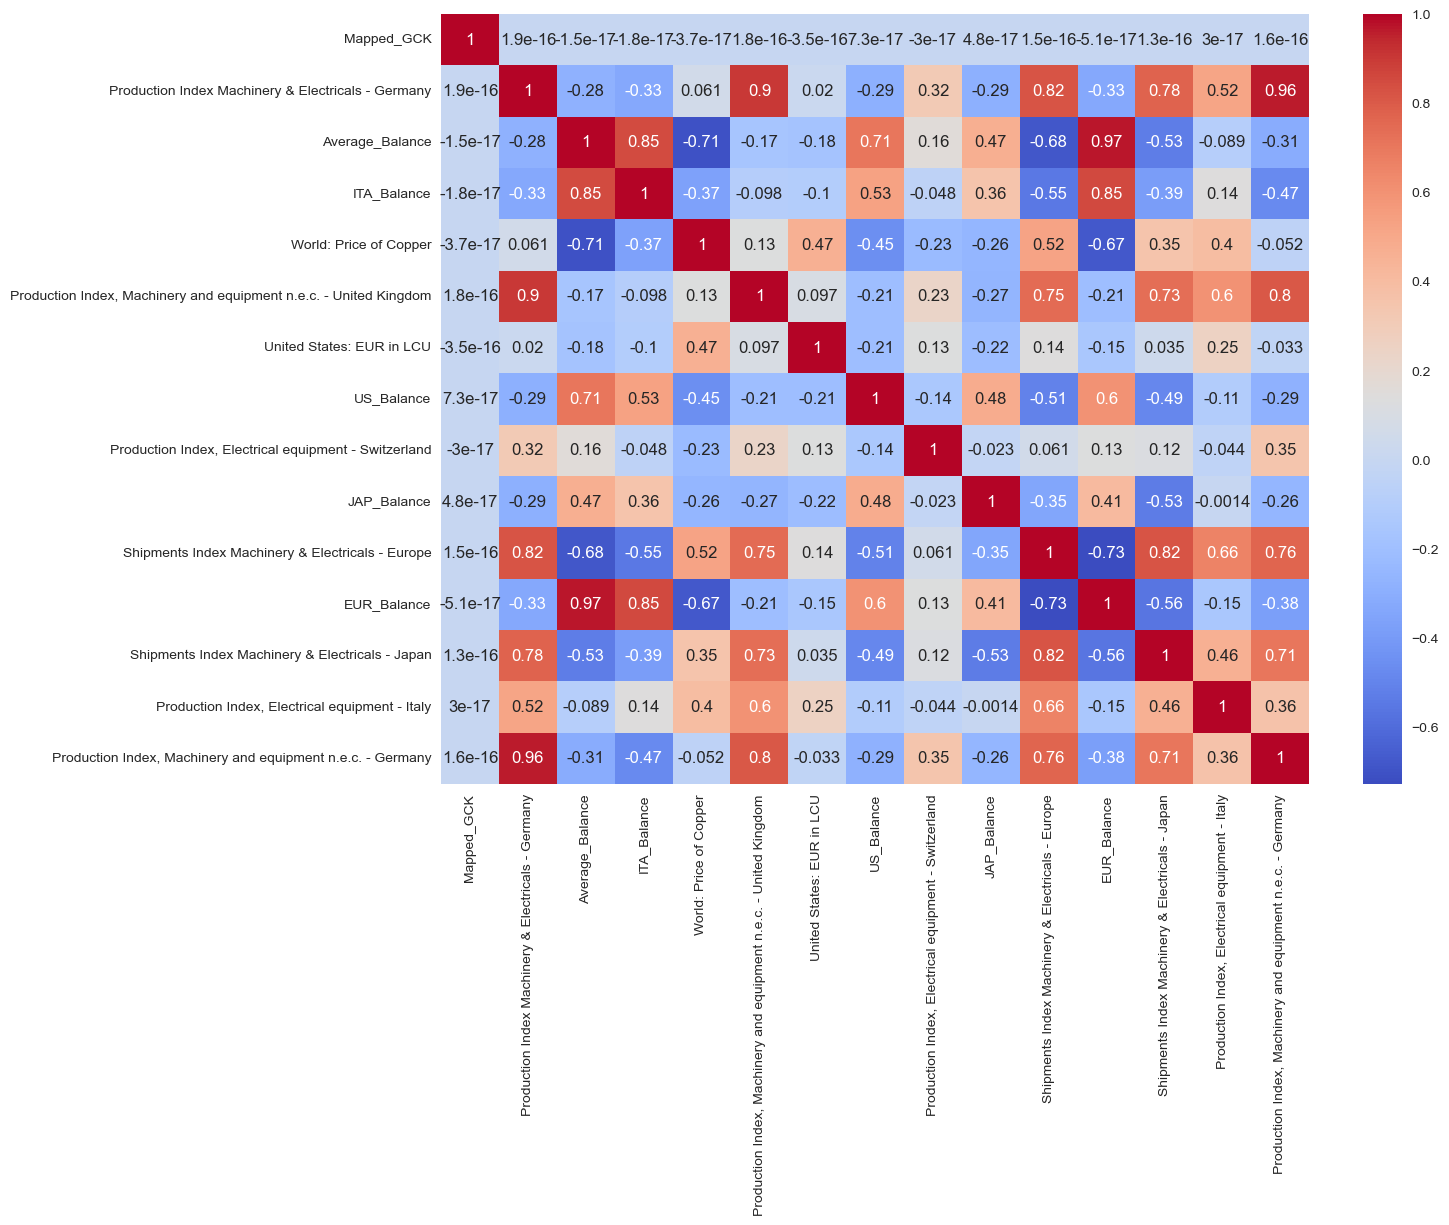

In [134]:
fig, ax = plt.subplots(figsize=(14, 10))  # You can adjust the size as needed
# Your plotting code here
correlation = final_dataset[important_features].corr()

# Create a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()


Our top 5 features according to XGBoost:

Mapped_GCK, Production Index Machinery & Electricals - Ge, Average_Balance, ITA_Balance, World: Price of CopperMapped_GCK, Production Index Machinery & Electricals - Ge, Average_Balance, ITA_Balance, World: Price of Copper

So we should focus on keeping these

### we ll assume a treshold of 0.05 on the XGboost

In [135]:
important_features

['Mapped_GCK',
 'Production Index Machinery & Electricals - Germany',
 'Average_Balance',
 'ITA_Balance',
 'World: Price of Copper',
 'Production Index, Machinery and equipment n.e.c. - United Kingdom',
 'United States: EUR in LCU',
 'US_Balance',
 'Production Index, Electrical equipment - Switzerland',
 'JAP_Balance',
 'Shipments Index Machinery & Electricals - Europe',
 'EUR_Balance',
 'Shipments Index Machinery & Electricals - Japan',
 'Production Index, Electrical equipment - Italy',
 'Production Index, Machinery and equipment n.e.c. - Germany']

In [136]:
important_features = ['Mapped_GCK',
 'Production Index Machinery & Electricals - Germany',
 'Average_Balance']


In [137]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602 entries, 0 to 601
Data columns (total 61 columns):
 #   Column                                                             Non-Null Count  Dtype    
---  ------                                                             --------------  -----    
 0   Mapped_GCK                                                         602 non-null    float64  
 1   DATE                                                               602 non-null    period[M]
 2   Month                                                              602 non-null    int64    
 3   Sales_EUR                                                          602 non-null    float64  
 4   Production Index Machinery & Electricals - China                   602 non-null    float64  
 5   Shipments Index Machinery & Electricals - China                    602 non-null    float64  
 6   Production Index Machinery & Electricals - France                  602 non-null    float64  
 7   Shipment

In [138]:
#Random Forests

from sklearn.ensemble import RandomForestRegressor

# Assuming final_dataset is your DataFrame, 'Sales_EUR' is the target variable,
# 'Date' is the date column, and 'Mapped_GCK' is a categorical variable

# Drop the 'Date' column
X = final_dataset.drop(['Sales_EUR', 'DATE'], axis=1)
y = final_dataset['Sales_EUR']

# Fit the model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                                              Feature  Importance
0                                          Mapped_GCK        0.96
6   Production Index Machinery & Electricals - Ger...        0.01
15  Shipments Index Machinery & Electricals - Unit...        0.00
31    Producer Prices, Electrical equipment - Germany        0.00
52                                        ITA_Balance        0.00
44  Production Index, Electrical equipment - Unite...        0.00
54                                        SWI_Balance        0.00
26                          United States: EUR in LCU        0.00
40  Production Index, Machinery and equipment n.e....        0.00
56                                         US_Balance        0.00
53                                        JAP_Balance        0.00
50                                        FRA_Balance        0.00
43  Production Index, Electrical equipment - Switz...        0.00
58                                    Average_Balance        0.00
36  Produc

### combination of the features selected with the different algorithms

In [139]:
Combination_features_selected = ['Mapped_GCK',
 'Production Index Machinery & Electricals - Germany',
 'Average_Balance', 'Production Index Machinery & Electricals - France', 'FRA_Balance']

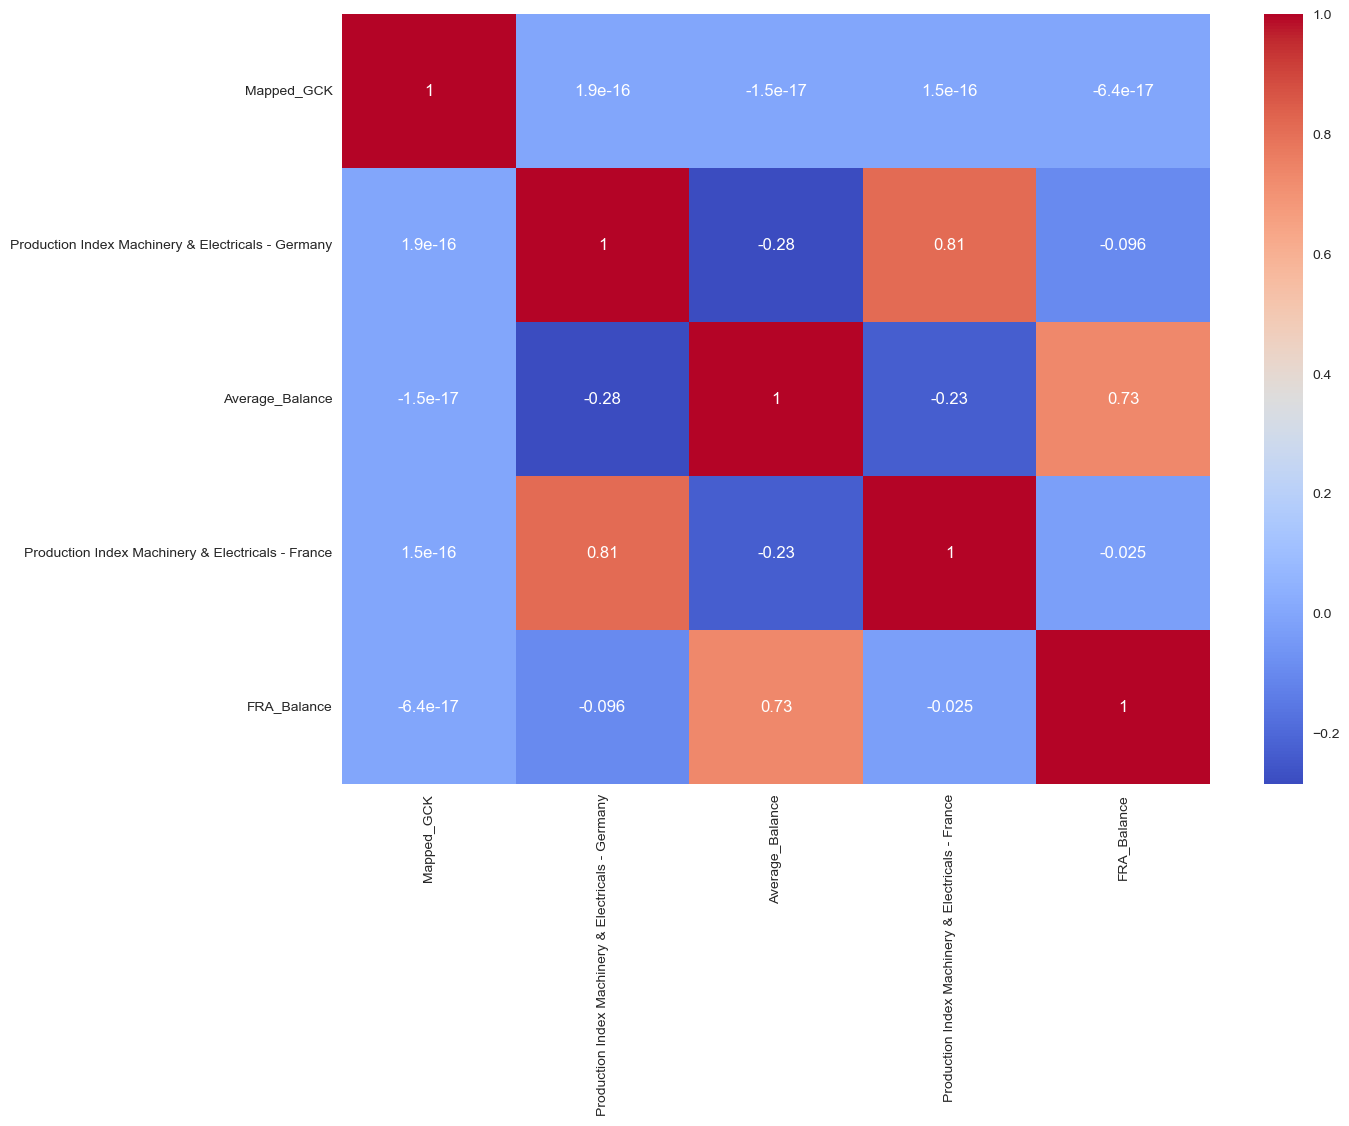

In [140]:
fig, ax = plt.subplots(figsize=(14, 10))  # You can adjust the size as needed
# Your plotting code here
correlation = final_dataset[Combination_features_selected].corr()

# Create a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [141]:
Combination_features_selected = ['Mapped_GCK',
 'Production Index Machinery & Electricals - Germany',
 'Average_Balance']

In [142]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602 entries, 0 to 601
Data columns (total 61 columns):
 #   Column                                                             Non-Null Count  Dtype    
---  ------                                                             --------------  -----    
 0   Mapped_GCK                                                         602 non-null    float64  
 1   DATE                                                               602 non-null    period[M]
 2   Month                                                              602 non-null    int64    
 3   Sales_EUR                                                          602 non-null    float64  
 4   Production Index Machinery & Electricals - China                   602 non-null    float64  
 5   Shipments Index Machinery & Electricals - China                    602 non-null    float64  
 6   Production Index Machinery & Electricals - France                  602 non-null    float64  
 7   Shipment

In [143]:
# create a new dataframe with selected columns
predictions_df = final_dataset[['DATE', 'Mapped_GCK', 'Sales_EUR', 'Production Index Machinery & Electricals - Germany', 'Average_Balance']]
predictions_df.head()


,DATE,Mapped_GCK,Sales_EUR,Production Index Machinery & Electricals - Germany,Average_Balance
0,2018-10,1.00,36098918.79,124.23,-5.34
1,2018-10,11.00,1021303.50,124.23,-5.34
2,2018-10,12.00,28686.33,124.23,-5.34
3,2018-10,13.00,27666.10,124.23,-5.34
4,2018-10,14.00,5770.00,124.23,-5.34


# We can try to make predictions using all the products with predictions_df or by product

# Data sets by product

In [144]:
unique_gcks = final_dataset['Mapped_GCK'].unique()
unique_gcks

array([ 1., 11., 12., 13., 14., 16., 20.,  3., 36.,  4.,  5.,  6.,  8.,
        9.])

In [145]:
GCK1_df = final_dataset[final_dataset['Mapped_GCK'] == 1]


In [146]:
GCK1_df = final_dataset[final_dataset['Mapped_GCK'] == 1]
GCK3_df = final_dataset[final_dataset['Mapped_GCK'] == 3]
GCK4_df = final_dataset[final_dataset['Mapped_GCK'] == 4]
GCK5_df = final_dataset[final_dataset['Mapped_GCK'] == 5]
GCK6_df = final_dataset[final_dataset['Mapped_GCK'] == 6]
GCK8_df = final_dataset[final_dataset['Mapped_GCK'] == 8]
GCK9_df = final_dataset[final_dataset['Mapped_GCK'] == 9]
GCK11_df = final_dataset[final_dataset['Mapped_GCK'] == 11]
GCK12_df = final_dataset[final_dataset['Mapped_GCK'] == 12]
GCK13_df = final_dataset[final_dataset['Mapped_GCK'] == 13]
GCK14_df = final_dataset[final_dataset['Mapped_GCK'] == 14]
GCK16_df = final_dataset[final_dataset['Mapped_GCK'] == 16]
GCK20_df = final_dataset[final_dataset['Mapped_GCK'] == 20]
GCK36_df = final_dataset[final_dataset['Mapped_GCK'] == 36]


# GCK 1

In [147]:
GCK1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 588
Data columns (total 61 columns):
 #   Column                                                             Non-Null Count  Dtype    
---  ------                                                             --------------  -----    
 0   Mapped_GCK                                                         43 non-null     float64  
 1   DATE                                                               43 non-null     period[M]
 2   Month                                                              43 non-null     int64    
 3   Sales_EUR                                                          43 non-null     float64  
 4   Production Index Machinery & Electricals - China                   43 non-null     float64  
 5   Shipments Index Machinery & Electricals - China                    43 non-null     float64  
 6   Production Index Machinery & Electricals - France                  43 non-null     float64  
 7   Shipments

<Axes: xlabel='DATE'>

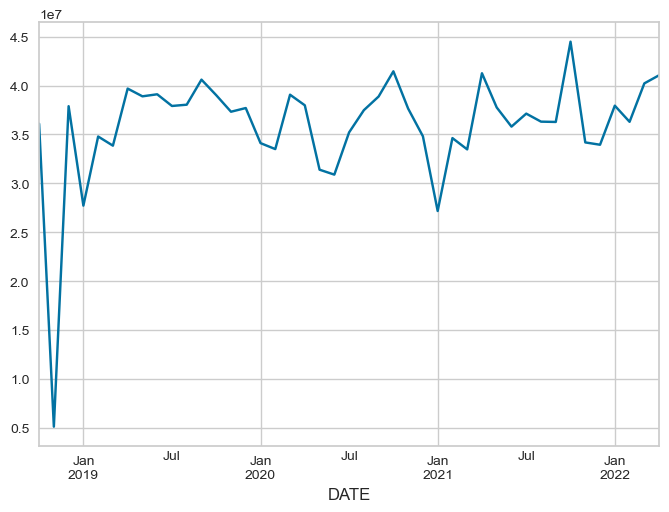

In [148]:
GCK1_df.groupby('DATE')['Sales_EUR'].sum().plot()

# Deal with the outliers, without messing with possible nans

In [149]:
GCK1_df.isnull().sum()[GCK1_df.isnull().sum() > 0]

Series([], dtype: int64)

# Deal with nans if any

# Feature Selection

In [150]:
#Correlation Matrix
correlation = GCK1_df.corr()
correlation = correlation[abs(correlation['Sales_EUR']) > 0.25]['Sales_EUR']
print(correlation)

corr_feat_GCK1 = correlation.index.tolist()

corr_feat_GCK1

Sales_EUR      1.00
SWI_Balance   -0.30
US_Balance    -0.30
Name: Sales_EUR, dtype: float64


C:\Users\Estevao\AppData\Local\Temp\ipykernel_7800\3732730987.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = GCK1_df.corr()


['Sales_EUR', 'SWI_Balance', 'US_Balance']

In [151]:
from sklearn.tree import DecisionTreeRegressor

# Assuming final_dataset is your DataFrame, 'Sales_EUR' is the target variable,
# 'Date' is the date column, and 'Mapped_GCK' is a categorical variable

# Drop the 'Date' column
X = GCK1_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK1_df['Sales_EUR']

# Fit the model
model = DecisionTreeRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
dt_feat_GCK1 = importance_df['Feature'].tolist()
dt_feat_GCK1

                                              Feature  Importance
5   Production Index Machinery & Electricals - Ger...        0.67
51                                        ITA_Balance        0.13
2     Shipments Index Machinery & Electricals - China        0.04
25                          United States: EUR in LCU        0.03
22                  World: Price of Natural gas index        0.03
24                             World: Price of Copper        0.03
46    Production Index, Electrical equipment - France        0.02
38  Production Index, Machinery and equipment n.e....        0.01
44     Production Index, Electrical equipment - Italy        0.01
37  Production Index, Machinery and equipment n.e....        0.01
1    Production Index Machinery & Electricals - China        0.01
40  Production Index, Electrical equipment - Unite...        0.00
16  Shipments Index Machinery & Electricals - Unit...        0.00
11  Production Index Machinery & Electricals - Swi...        0.00
28      Pr

['Production Index Machinery & Electricals - Germany', 'ITA_Balance']

In [152]:
from sklearn.ensemble import RandomForestRegressor

# Assuming final_dataset is your DataFrame, 'Sales_EUR' is the target variable,
# 'Date' is the date column, and 'Mapped_GCK' is a categorical variable

# Drop the 'Date' column
X = GCK1_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK1_df['Sales_EUR']

# Fit the model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
rf_feat_GCK1 = importance_df['Feature'].tolist()
rf_feat_GCK1

                                              Feature  Importance
5   Production Index Machinery & Electricals - Ger...        0.23
51                                        ITA_Balance        0.09
14  Shipments Index Machinery & Electricals - Unit...        0.08
39  Production Index, Machinery and equipment n.e....        0.06
18   Shipments Index Machinery & Electricals - Europe        0.04
30    Producer Prices, Electrical equipment - Germany        0.04
53                                        SWI_Balance        0.03
43  Production Index, Electrical equipment - Unite...        0.03
35  Production Index, Machinery and equipment n.e....        0.03
22                  World: Price of Natural gas index        0.03
33  Production Index, Machinery and equipment n.e....        0.02
47   Production Index, Electrical equipment - Germany        0.02
29     Producer Prices, Electrical equipment - France        0.02
0                                               Month        0.02
2     Ship

['Production Index Machinery & Electricals - Germany']

In [153]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Drop the 'Date' column
X = GCK1_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK1_df['Sales_EUR']

model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, y)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

# Get column names
column_names = X.columns

# Get selected features
rfe_feat_GCK1 = column_names[fit.support_]

print("Selected Features: %s" % (rfe_feat_GCK1))

Num Features: 5
Selected Features: [False False False  True  True False False False False  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False  True False False False False False False False False]
Feature Ranking: [26 45 49  1  1 46 51  3  5  1 10 15 12 34 39 40 44  7  6 30 35 31 42 37
 33 18 29 41 20 19 21 23 48 27 13 53 52  1 16 36 47 25 14 43 28  2 17 50
 54  1 38  4  9 11 24 32  8 22]
Selected Features: Index(['Production Index Machinery & Electricals - France',
       'Shipments Index Machinery & Electricals - France',
       'Production Index Machinery & Electricals - Japan',
       'Production Index, Machinery and equipment n.e.c. - Japan',
       'FRA_Balance'],
      dtype='object')


In [154]:
#XGBoost
from xgboost import XGBRegressor

X = GCK1_df.drop(['Sales_EUR', 'DATE', 'Mapped_GCK'], axis=1)
y = GCK1_df['Sales_EUR']

model = XGBRegressor()
model.fit(X,y)

importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

importance_df = importance_df[importance_df['Importance'] > 0.1]
xgb_feat_GCK1 = importance_df['Feature'].tolist()
xgb_feat_GCK1

                                              Feature  Importance
5   Production Index Machinery & Electricals - Ger...        0.28
51                                        ITA_Balance        0.21
27  Producer Prices, Electrical equipment - United...        0.12
21                 World: Price of Metals  & Minerals        0.08
18   Shipments Index Machinery & Electricals - Europe        0.07
39  Production Index, Machinery and equipment n.e....        0.05
1    Production Index Machinery & Electricals - China        0.03
20                             World: Price of Energy        0.03
43  Production Index, Electrical equipment - Unite...        0.02
4    Shipments Index Machinery & Electricals - France        0.02
35  Production Index, Machinery and equipment n.e....        0.02
3   Production Index Machinery & Electricals - France        0.01
46    Production Index, Electrical equipment - France        0.01
8     Shipments Index Machinery & Electricals - Italy        0.01
23        

['Production Index Machinery & Electricals - Germany',
 'ITA_Balance',
 'Producer Prices, Electrical equipment - United Kingdom']

In [160]:
#Combinantion of the features selected

final_feat_GCK1 = dt_feat_GCK1
final_feat_GCK1.extend(rf_feat_GCK1)
final_feat_GCK1.extend(corr_feat_GCK1)
final_feat_GCK1.extend(rfe_feat_GCK1)
final_feat_GCK1.extend(xgb_feat_GCK1)

final_feat_GCK1

['Production Index Machinery & Electricals - Germany',
 'ITA_Balance',
 'Production Index Machinery & Electricals - Germany',
 'Sales_EUR',
 'SWI_Balance',
 'US_Balance',
 'Production Index Machinery & Electricals - France',
 'Shipments Index Machinery & Electricals - France',
 'Production Index Machinery & Electricals - Japan',
 'Production Index, Machinery and equipment n.e.c. - Japan',
 'FRA_Balance',
 'Production Index Machinery & Electricals - Germany',
 'ITA_Balance',
 'Producer Prices, Electrical equipment - United Kingdom']

In [ ]:
#Check their correlation and drop the less important correlated ones

# GCK 3

# GCK 4

# GCK 5

# GCK 6

# GCK 8

# GCK 9

# GCK 11

# GCK 12

# GCK 13

# GCK 14

# GCK 16

# GCK 20

# GCK 36